In [1]:
import pandas as pd

df = pd.read_csv('/content/Daily_Demand_Forecasting_Orders.csv', sep=';')

#df=df.drop(columns = ['date'])
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
#df = imputer.fit_transform(df)

'''
df=df.dropna()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le1 = LabelEncoder()
le2 = LabelEncoder()
'''


#df['icon']= le.fit_transform(df['icon'])

y = df['Non-urgent order'].values
df=df.drop(columns = ['Non-urgent order'])
X = df.values


In [8]:
df

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


In [2]:

y=y.reshape(-1, 1)


import numpy as np
X=np.concatenate((X[1:], y[0:-1]), axis=1)

In [7]:
pip install keras-self-attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18912 sha256=d9239fc7fe51bf4f9cdbaa5ea16855eb7d4f4c51cb788fae3eb0db7ec387bc00
  Stored in directory: /root/.cache/pip/wheels/95/b1/a8/5ee00cc137940b2f6fa198212e8f45d813d0e0d9c3a04035a3
Successfully built keras-self-attention


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

In [8]:
pip install pyrcn

     |████████████████████████████████| 81 kB 6.1 MB/s 


In [4]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y[1:], test_size=0.2, shuffle=False, random_state=42)


In [12]:
x_train1.shape

(47, 13)

In [5]:
from pyrcn.base.blocks import InputToNode
from sklearn . datasets import make_blobs
# Generate a toy dataset

In [6]:
input_to_node = InputToNode (25, input_activation='relu',input_scaling =1.0 )


x_train= input_to_node.fit_transform (x_train1)
x_test= input_to_node.transform (x_test1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:77: FutureWarning: Pass hidden_layer_size=25 as keyword args. From version 1.1 (renaming of 0.26) passing these as positional arguments will result in an error
  FutureWarning,


In [7]:
from pyrcn.base.blocks import NodeToNode
node_to_node = NodeToNode (25, reservoir_activation='relu', spectral_radius =1.0 , leakage =0.8 ,bidirectional = False )
x_train=node_to_node . fit_transform(x_train)
x_test= node_to_node.transform (x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:77: FutureWarning: Pass hidden_layer_size=25 as keyword args. From version 1.1 (renaming of 0.26) passing these as positional arguments will result in an error
  FutureWarning,


In [8]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

x_train1 = x_train1.reshape((x_train1.shape[0], x_train1.shape[1], 1))
x_test1 = x_test1.reshape((x_test1.shape[0], x_test1.shape[1], 1))

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [11]:
from keras_self_attention import SeqSelfAttention
def build_model(
    input_shapey,
    input_shapez,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputsy = keras.Input(shape=input_shapey)
    inputsz = keras.Input(shape=input_shapez)
    y = inputsy
    z= inputsz

    #z=layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(z)

    #y=layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(y)

    z=SeqSelfAttention()(z)

    #y=SeqSelfAttention()(y)



    x=layers.Concatenate(axis=1)([y, z])
    #x=layers.Add()([inputsy, inputsz])

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    #outputs = layers.Dense(5, activation="softmax")(x)
    outputs = layers.Dense(1)(x)
    return keras.Model([inputsy,inputsz], outputs)

In [12]:
input_shapey = x_train1.shape[1:]
input_shapez = x_train.shape[1:]

model = build_model(
    input_shapey,
    input_shapez,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="mean_absolute_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["mean_absolute_error"],
)
'''
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["sparse_categorical_accuracy"],
)
'''
model.summary()





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 25, 1)]      0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 13, 1)]      0           []                               
                                                                                                  
 seq_self_attention (SeqSelfAtt  (None, 25, 1)       129         ['input_2[0][0]']                
 ention)                                                                                          
                                                                                                  
 concatenate (Concatenate)      (None, 38, 1)        0           ['input_1[0][0]',            

In [24]:
model.compile(
    loss="mean_absolute_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-2),
    metrics=["mean_absolute_error"],
)
callbacks = [keras.callbacks.EarlyStopping(patience=700, restore_best_weights=True)]

history=model.fit(
    [x_train1,x_train],
    y_train1,
    validation_data=([x_test1, x_test], y_test1),
    epochs=2000,
    batch_size=128,
    callbacks=callbacks,
)

Epoch 1/2000
1/1 [==============================] - 8s 8s/step - loss: 14.8275 - mean_absolute_error: 14.8275 - val_loss: 12.5695 - val_mean_absolute_error: 12.5695
Epoch 2/2000
1/1 [==============================] - 0s 56ms/step - loss: 13.9435 - mean_absolute_error: 13.9435 - val_loss: 79.7191 - val_mean_absolute_error: 79.7191
Epoch 3/2000
1/1 [==============================] - 0s 48ms/step - loss: 90.0105 - mean_absolute_error: 90.0105 - val_loss: 12.8104 - val_mean_absolute_error: 12.8104
Epoch 4/2000
1/1 [==============================] - 0s 53ms/step - loss: 21.1739 - mean_absolute_error: 21.1739 - val_loss: 75.6199 - val_mean_absolute_error: 75.6199
Epoch 5/2000
1/1 [==============================] - 0s 50ms/step - loss: 70.8551 - mean_absolute_error: 70.8551 - val_loss: 64.7875 - val_mean_absolute_error: 64.7875
Epoch 6/2000
1/1 [==============================] - 0s 50ms/step - loss: 59.1161 - mean_absolute_error: 59.1161 - val_loss: 39.3916 - val_mean_absolute_error: 39.3916


In [25]:
#testing prediction

#testing prediction
ypred=model.predict([x_test1, x_test])
#testing prediction

#testing prediction

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance
print('mse: ', mean_squared_error(ypred, y_test1))
print('mae: ', mean_absolute_error(ypred, y_test1))
print('r2_score: ', r2_score(ypred, y_test1))
print('explained_variance_score: ', explained_variance_score(ypred, y_test1))
print('max_error: ', max_error(ypred, y_test1))
#print('mean_squared_log_error: ', mean_squared_log_error(ypred, y_test1))
print('mean_poisson_deviance: ', r2_score(ypred, y_test1))
#print('mean_gamma_deviance: ',  mean_gamma_deviance(ypred, y_test1))


mse:  410.6521263648803
mae:  10.17325163269043
r2_score:  0.7205005677810223
explained_variance_score:  0.7439398825137934
max_error:  66.36134118652343
mean_poisson_deviance:  0.7205005677810223


In [26]:
#training prediction
xpred=model.predict([x_train1, x_train])
print('mse: ', mean_squared_error(xpred, y_train1))
print('mae: ', mean_absolute_error(xpred, y_train1))
print('r2_score: ', r2_score(xpred, y_train1))
print('explained_variance_score: ', explained_variance_score(xpred, y_train1))
print('max_error: ', max_error(xpred, y_train1))
#print('mean_squared_log_error: ', mean_squared_log_error(xpred, y_train1))
print('mean_poisson_deviance: ', r2_score(xpred, y_train1))
#print('mean_gamma_deviance: ',  mean_gamma_deviance(xpred, y_train1))

mse:  76.384331612868
mae:  7.489817030237074
r2_score:  0.9855169550515654
explained_variance_score:  0.9930567172961495
max_error:  20.046986083984393
mean_poisson_deviance:  0.9855169550515654


In [27]:
xx=[]
for i in range(len(ypred)):
    xx.append(i)

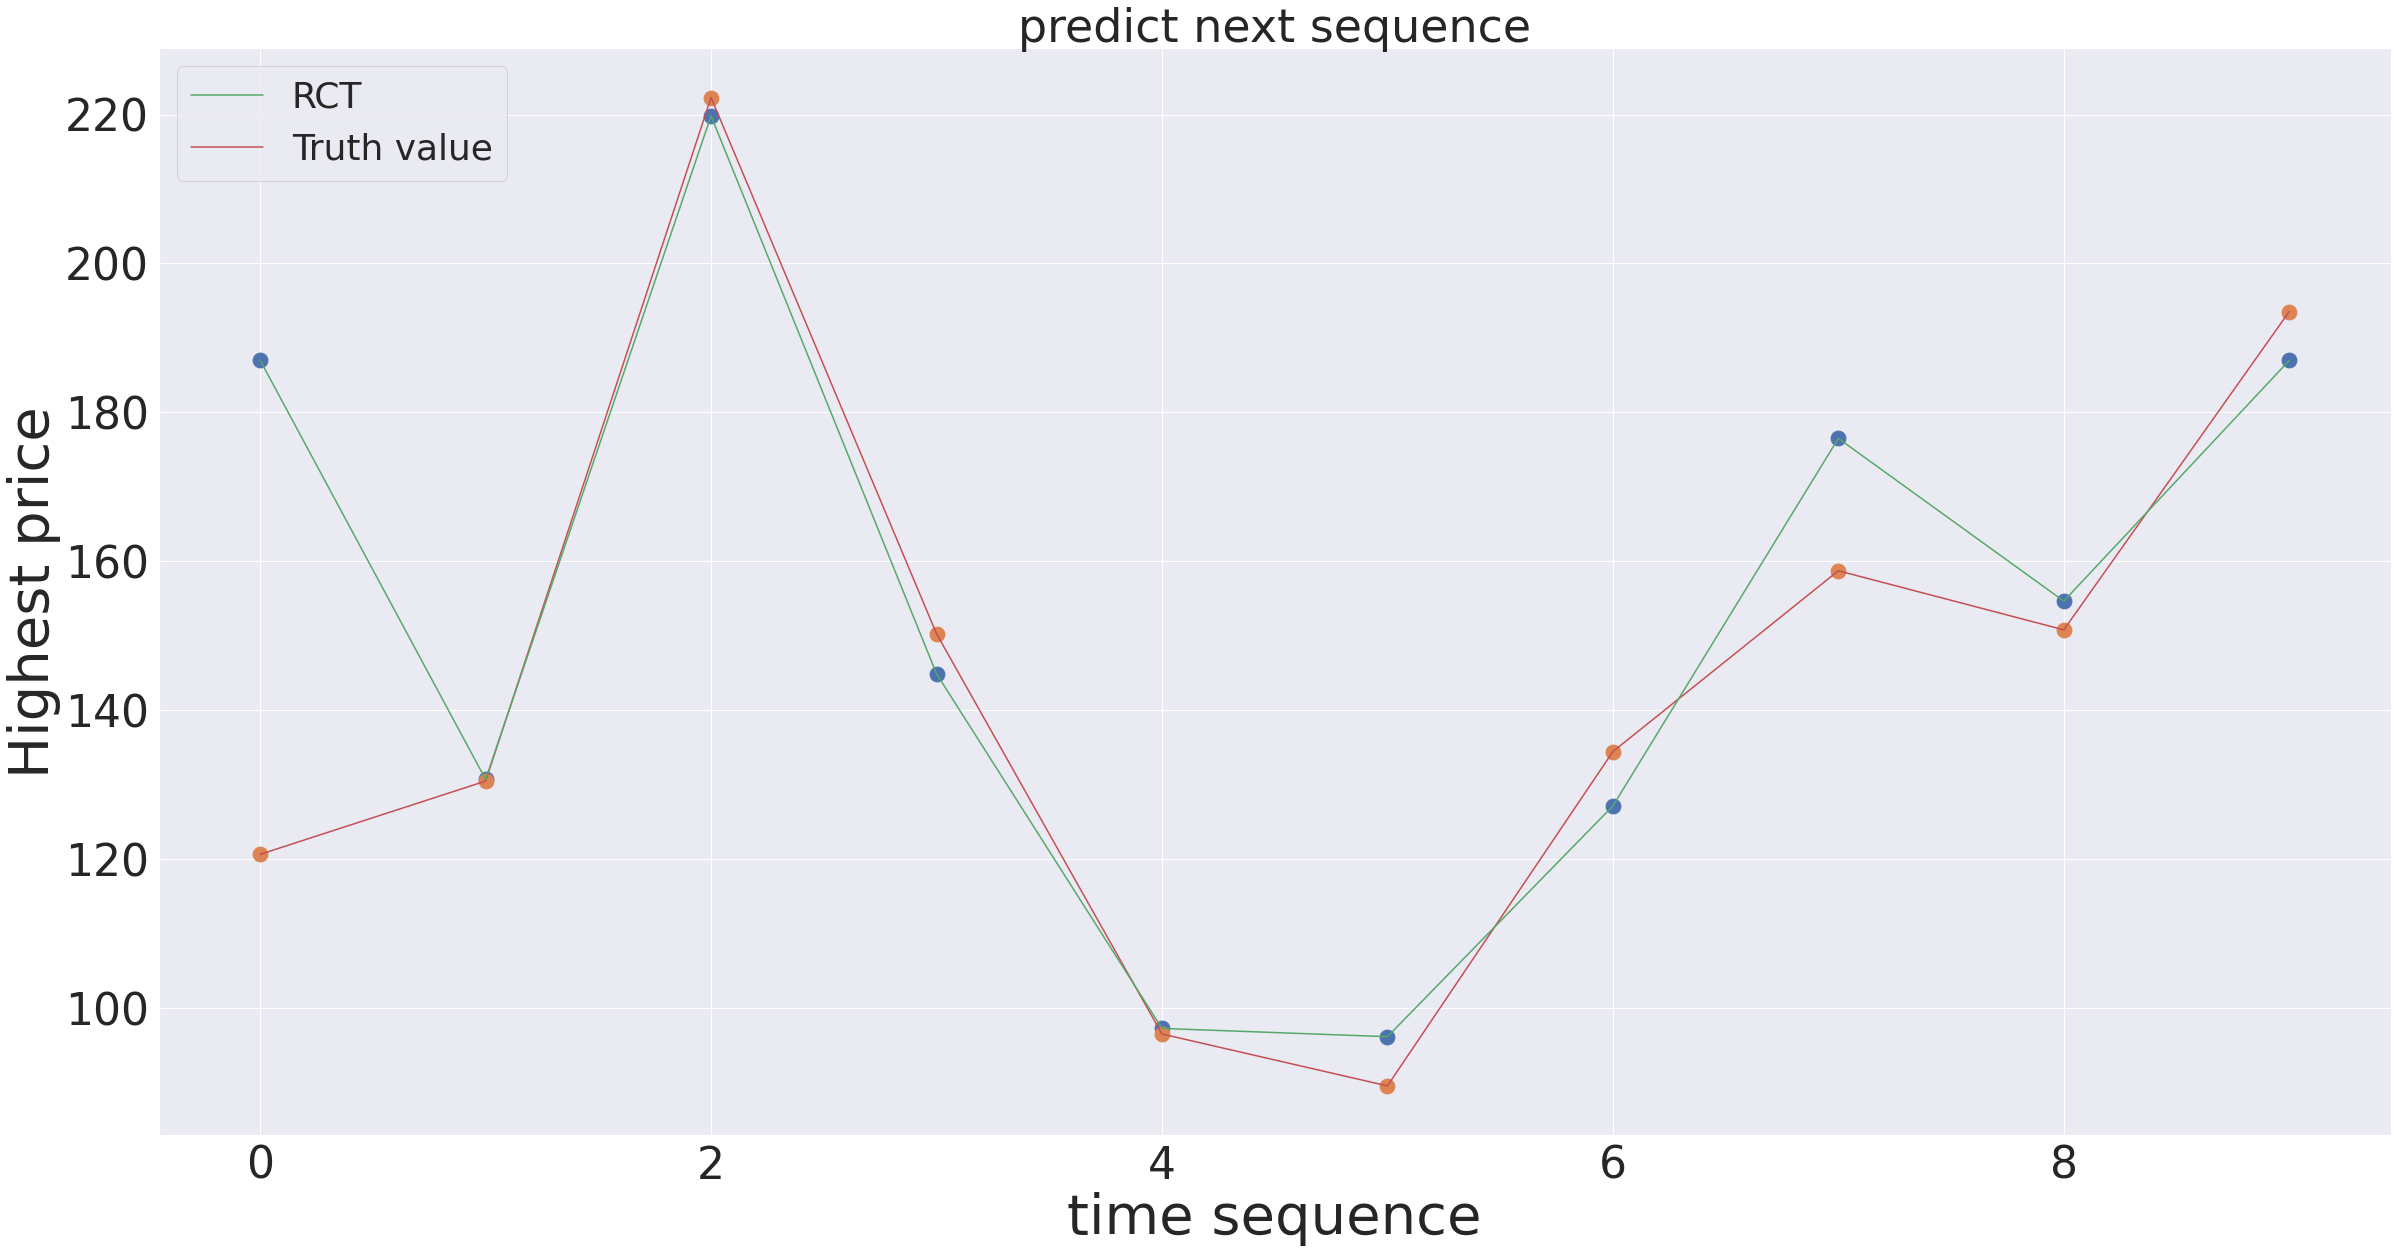

In [28]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 20]
i=0
j=10
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 4)
plt.figure()
plt.plot(xx[i:j],ypred[i:j], color='g', label='RCT', zorder=10)
plt.plot(xx[i:j],y_test1[i:j], color='r', label='Truth value')

plt.scatter(xx[i:j],ypred[i:j],  s=220, zorder=2)
plt.scatter(xx[i:j],y_test1[i:j],  s=220, zorder=2)

plt.legend(loc="upper left", fontsize=36)
plt.title('predict next sequence', fontsize=46)
plt.xlabel('time sequence', fontsize=56)
plt.ylabel('Highest price', fontsize=56)
plt.show()

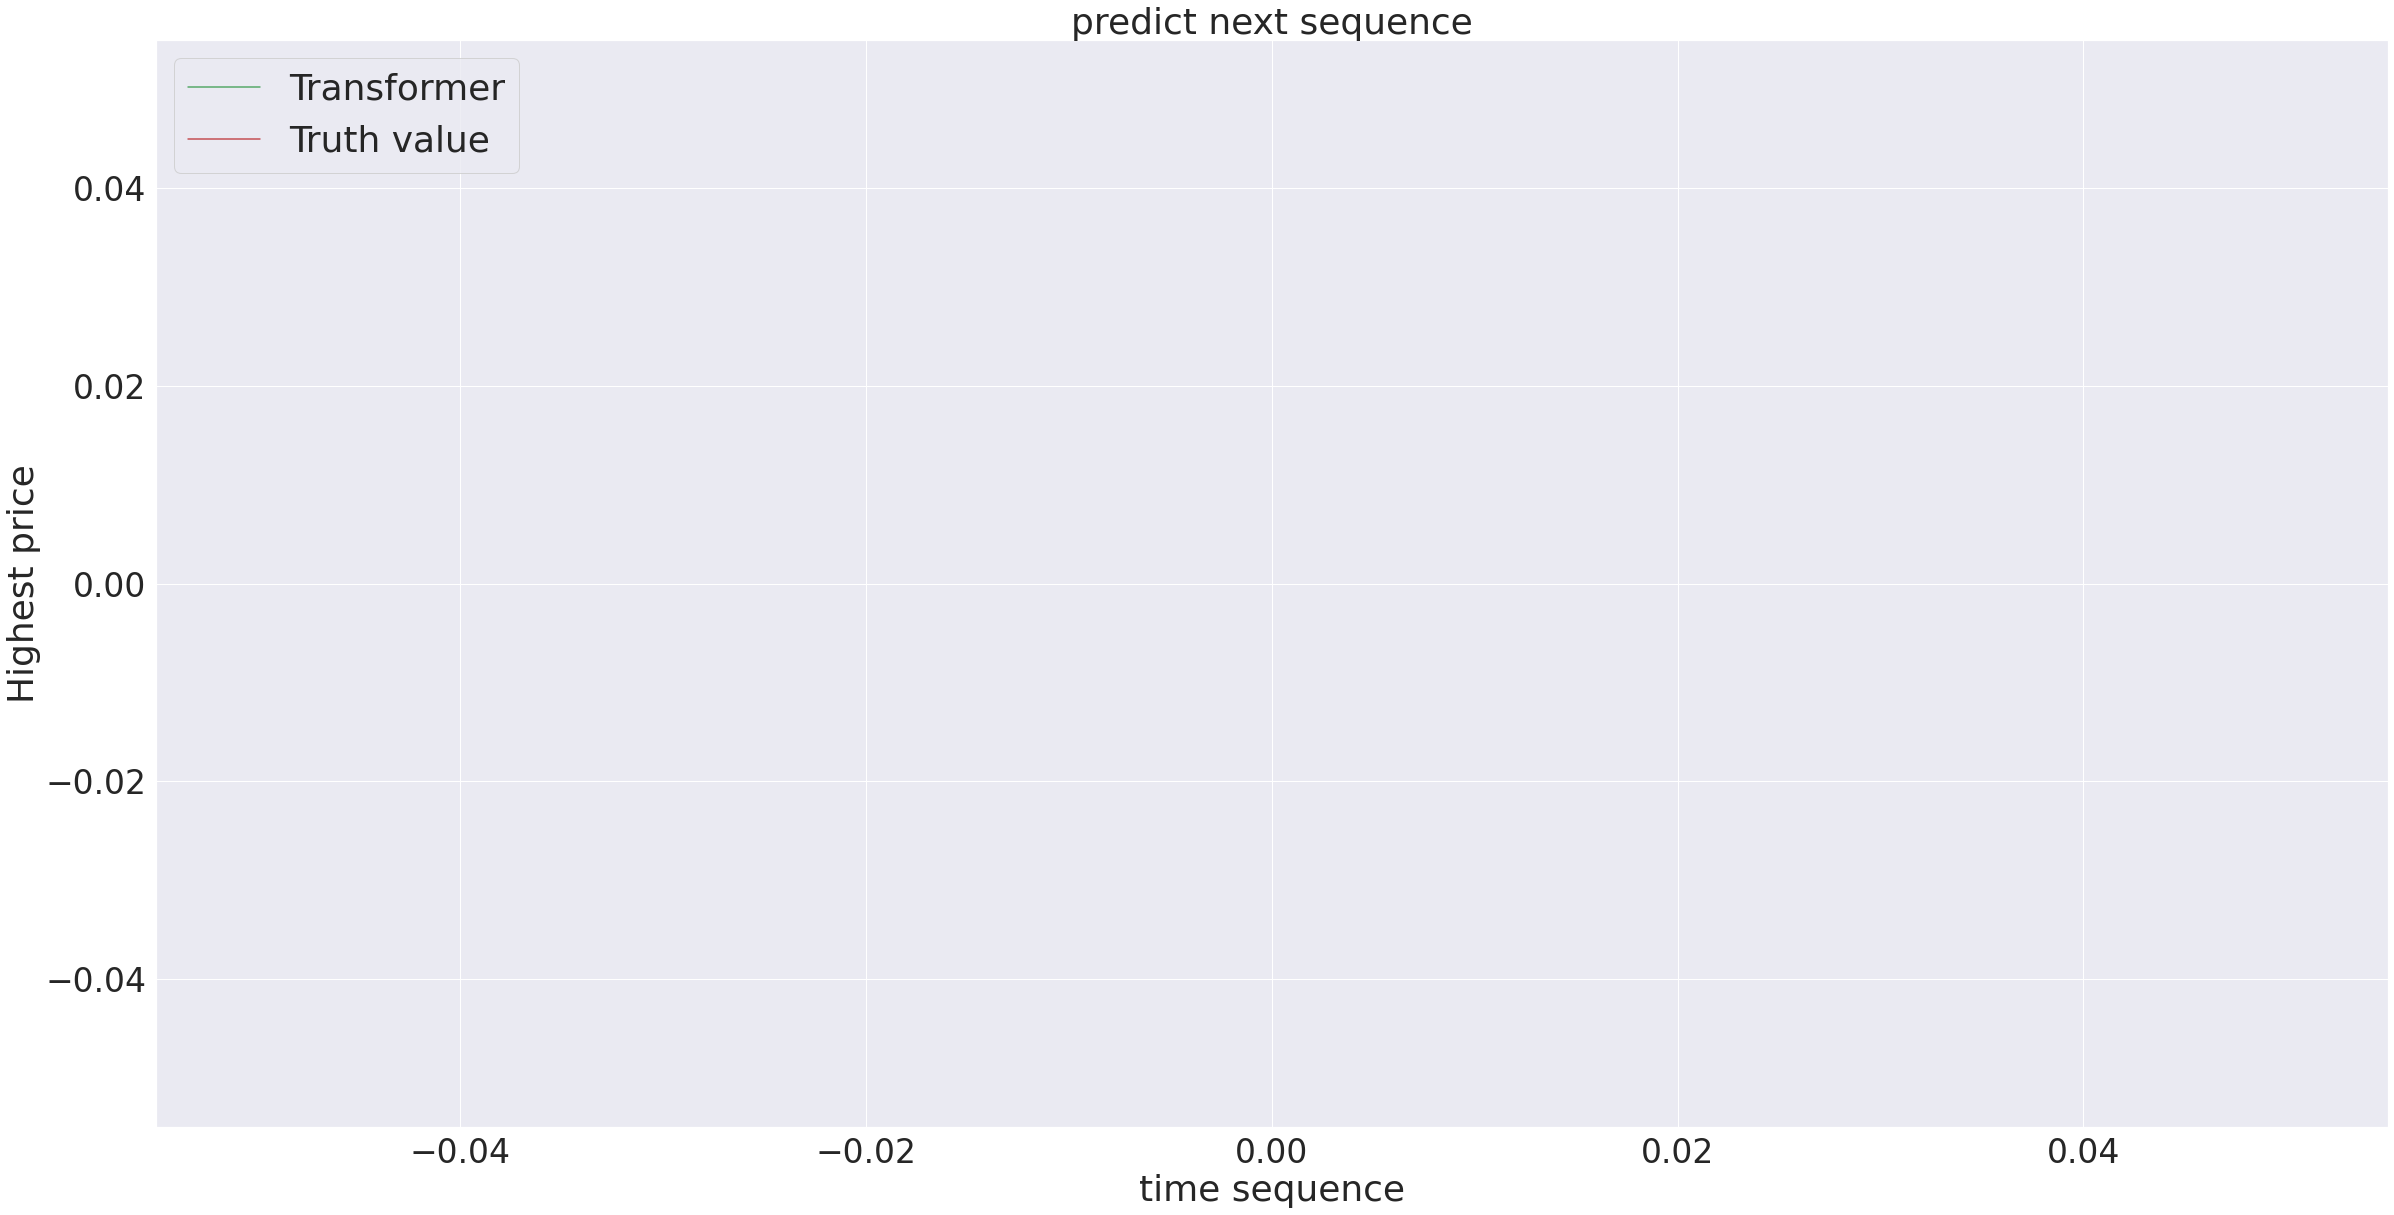

In [31]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 20]
i=50
j=100
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 3)
plt.figure()
plt.plot(xx[i:j],trans_y_predict[i:j], color='g', label='Transformer', zorder=10)
plt.plot(xx[i:j],y_test1[i:j], color='r', label='Truth value')

plt.scatter(xx[i:j],trans_y_predict[i:j],  s=120, zorder=2)
plt.scatter(xx[i:j],y_test1[i:j],  s=120, zorder=2)

plt.legend(loc="upper left", fontsize=36)
plt.title('predict next sequence', fontsize=36)
plt.xlabel('time sequence', fontsize=36)
plt.ylabel('Highest price', fontsize=36)
plt.show()

In [30]:
import pickle
with open('/content/trans_y_predict.pickle', 'rb') as handle:
    trans_y_predict = pickle.load(handle)

with open('/content/trans_x_predict.pickle', 'rb') as handle:
    trans_x_predict = pickle.load(handle)

*** compare for the testing data***

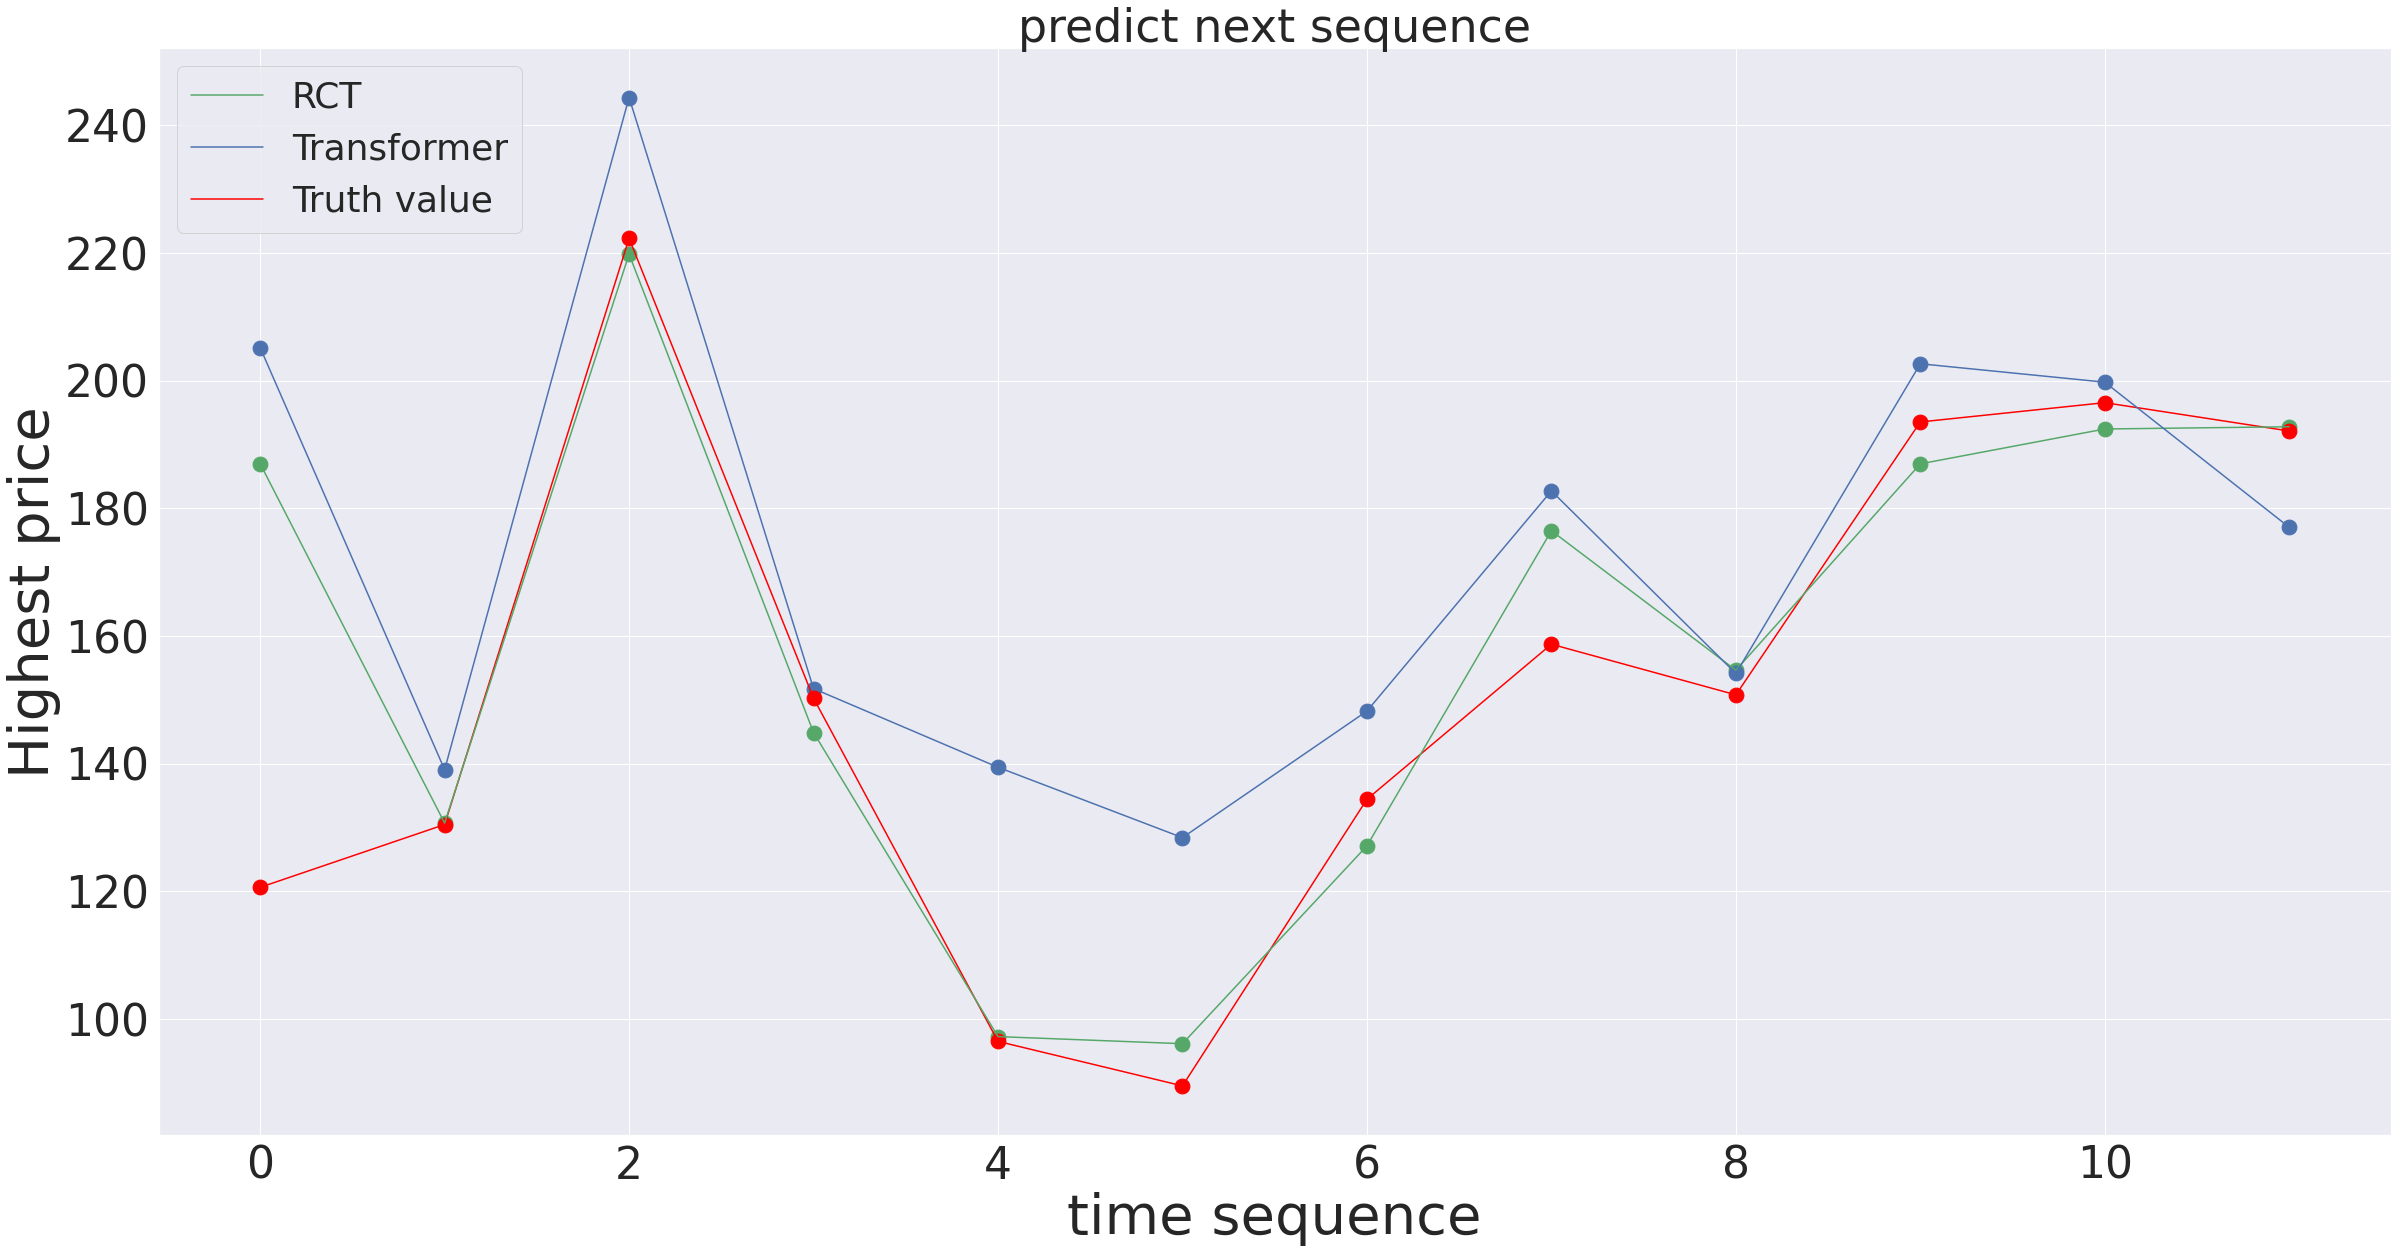

In [34]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 20]
i=0
j=80
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 4)
plt.figure()
plt.plot(xx[i:j],ypred[i:j], color='g', label='RCT', zorder=10)
plt.plot(xx[i:j],trans_y_predict[i:j], color='b', label='Transformer', zorder=10)
plt.plot(xx[i:j],y_test1[i:j], color='red', label='Truth value')

plt.scatter(xx[i:j],ypred[i:j], color='g', s=220, zorder=2)
plt.scatter(xx[i:j],trans_y_predict[i:j], color='b', s=220, zorder=2)
plt.scatter(xx[i:j],y_test1[i:j],  s=220,color='red', zorder=2)

plt.legend(loc="upper left", fontsize=36)
plt.title('predict next sequence', fontsize=46)
plt.xlabel('time sequence', fontsize=56)
plt.ylabel('Highest price', fontsize=56)
plt.show()

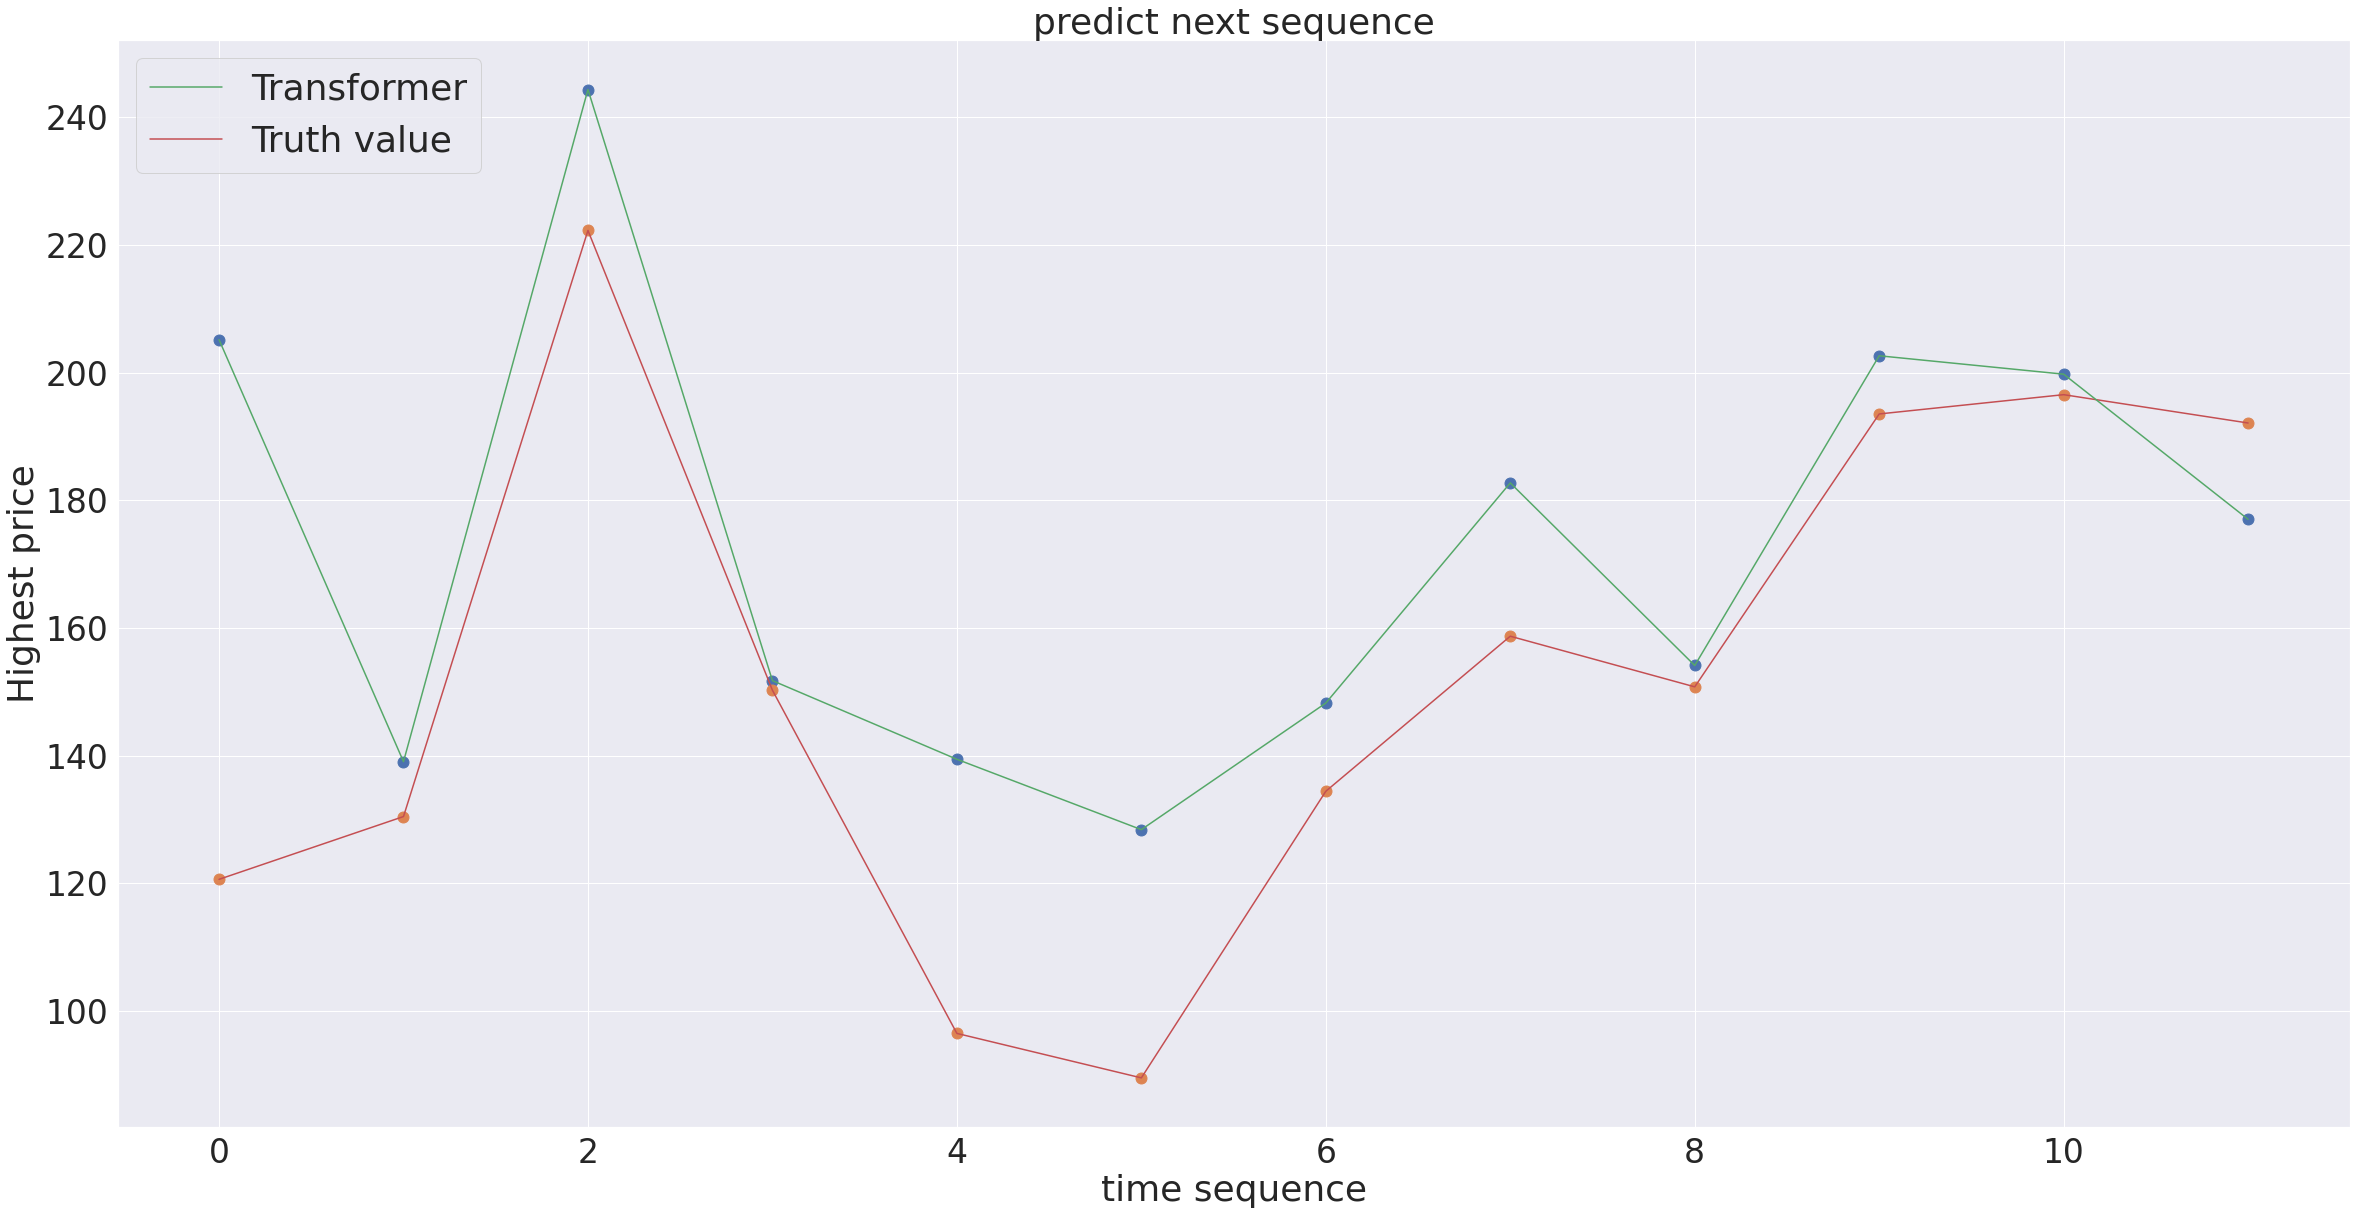

In [36]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 20]
i=0
j=450
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 3)
plt.figure()
plt.plot(xx[i:j],trans_y_predict[i:j], color='g', label='Transformer', zorder=10)
plt.plot(xx[i:j],y_test1[i:j], color='r', label='Truth value')

plt.scatter(xx[i:j],trans_y_predict[i:j],  s=120, zorder=2)
plt.scatter(xx[i:j],y_test1[i:j],  s=120, zorder=2)

plt.legend(loc="upper left", fontsize=36)
plt.title('predict next sequence', fontsize=36)
plt.xlabel('time sequence', fontsize=36)
plt.ylabel('Highest price', fontsize=36)
plt.show()

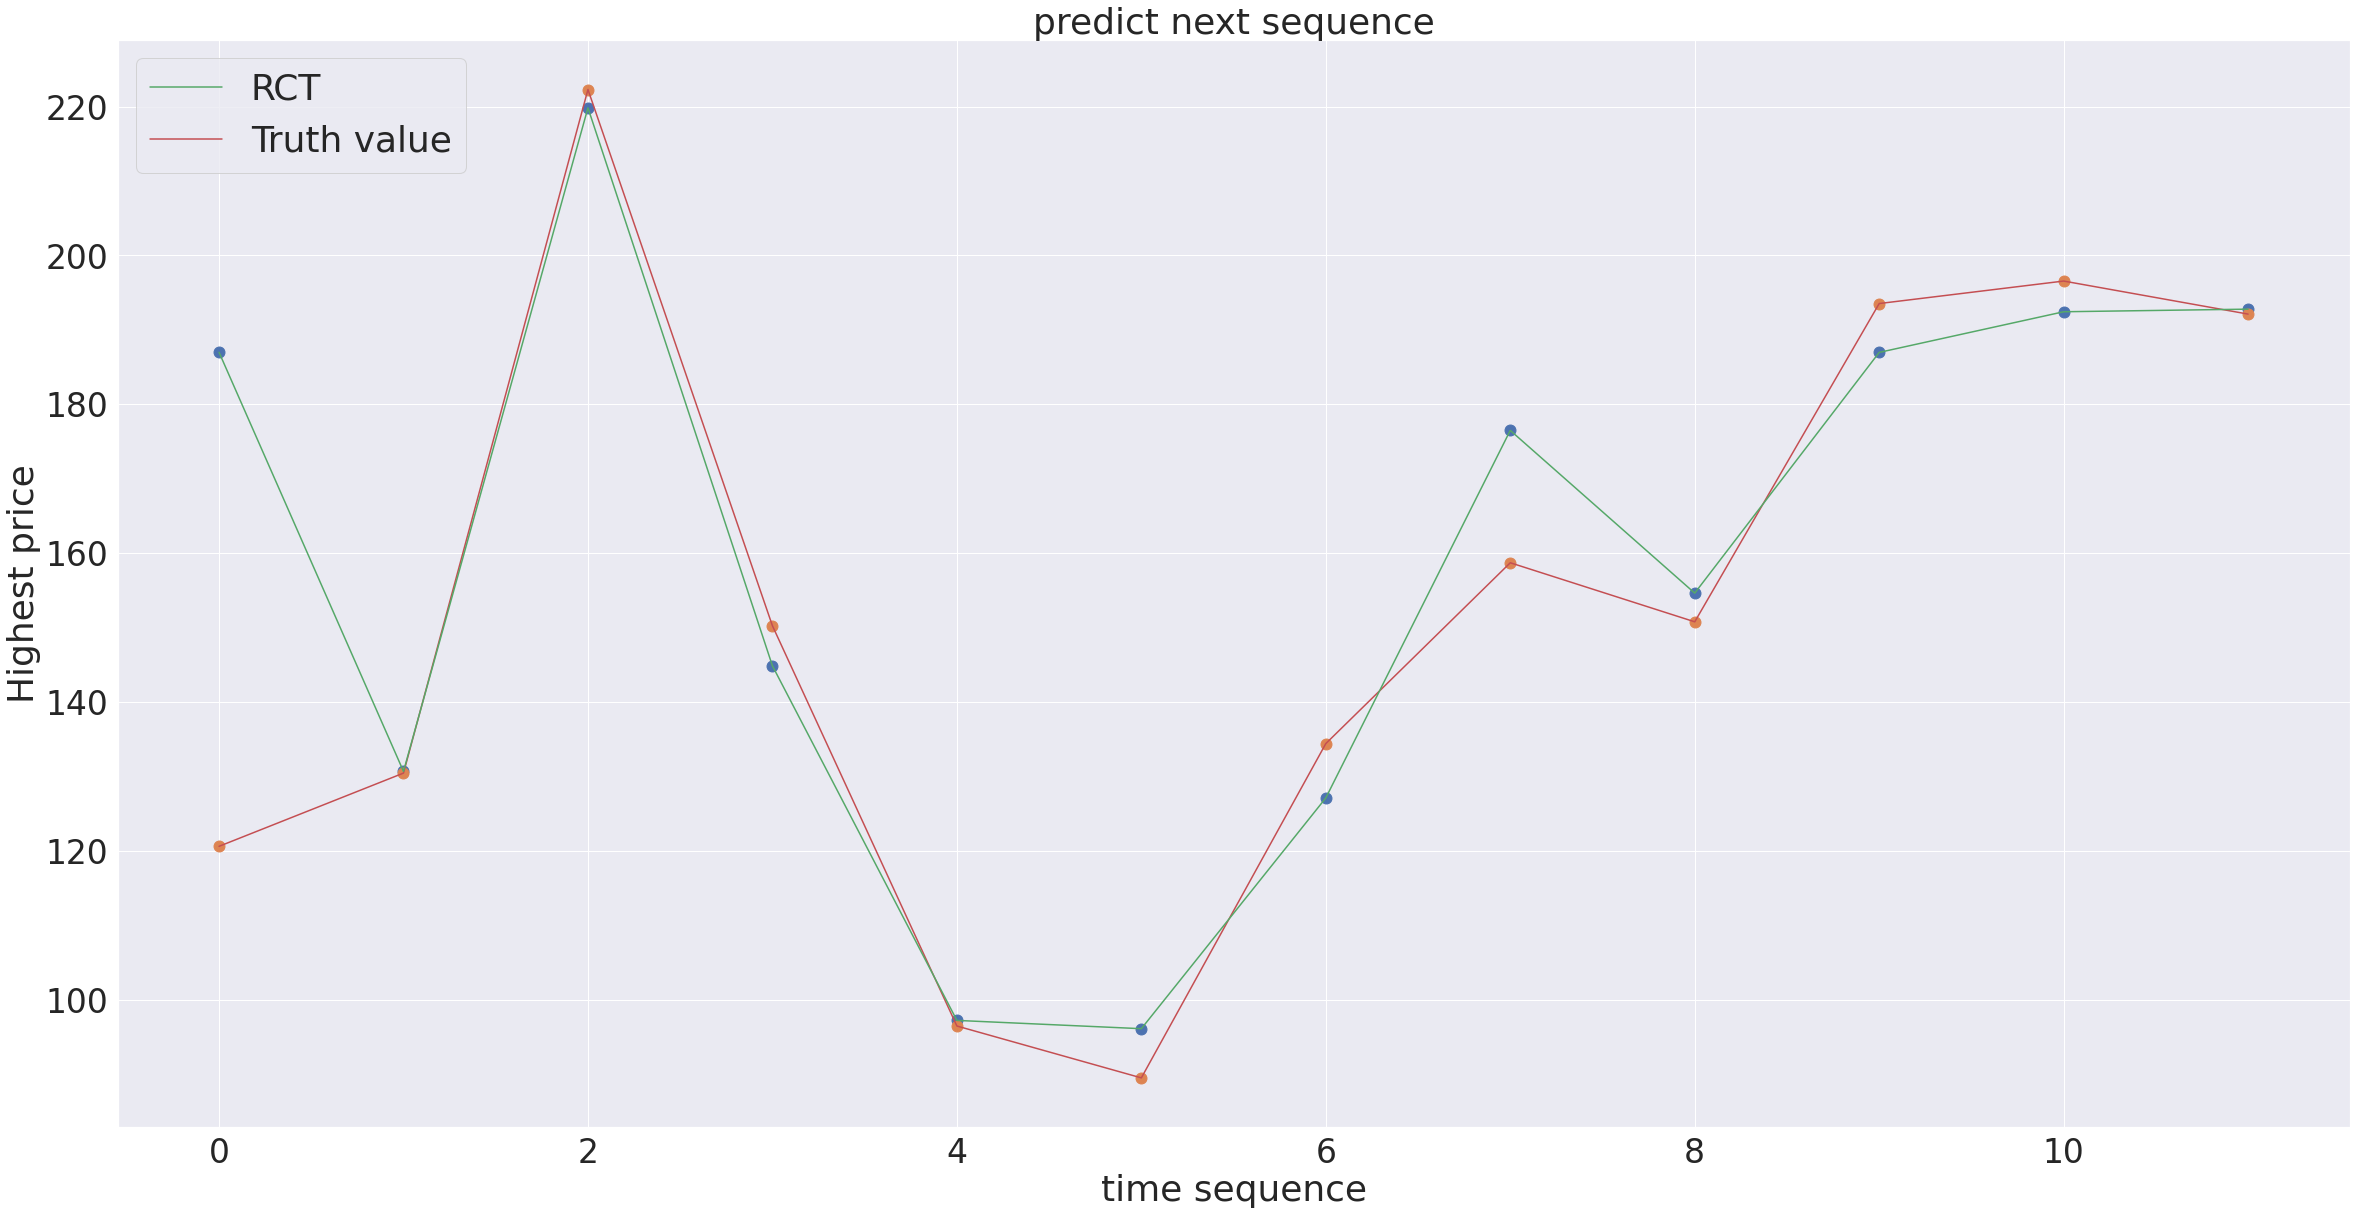

In [37]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 20]
i=0
j=450
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 3)
plt.figure()
plt.plot(xx[i:j],ypred[i:j], color='g', label='RCT', zorder=10)
plt.plot(xx[i:j],y_test1[i:j], color='r', label='Truth value')

plt.scatter(xx[i:j],ypred[i:j],  s=120, zorder=2)
plt.scatter(xx[i:j],y_test1[i:j],  s=120, zorder=2)

plt.legend(loc="upper left", fontsize=36)
plt.title('predict next sequence', fontsize=36)
plt.xlabel('time sequence', fontsize=36)
plt.ylabel('Highest price', fontsize=36)
plt.show()

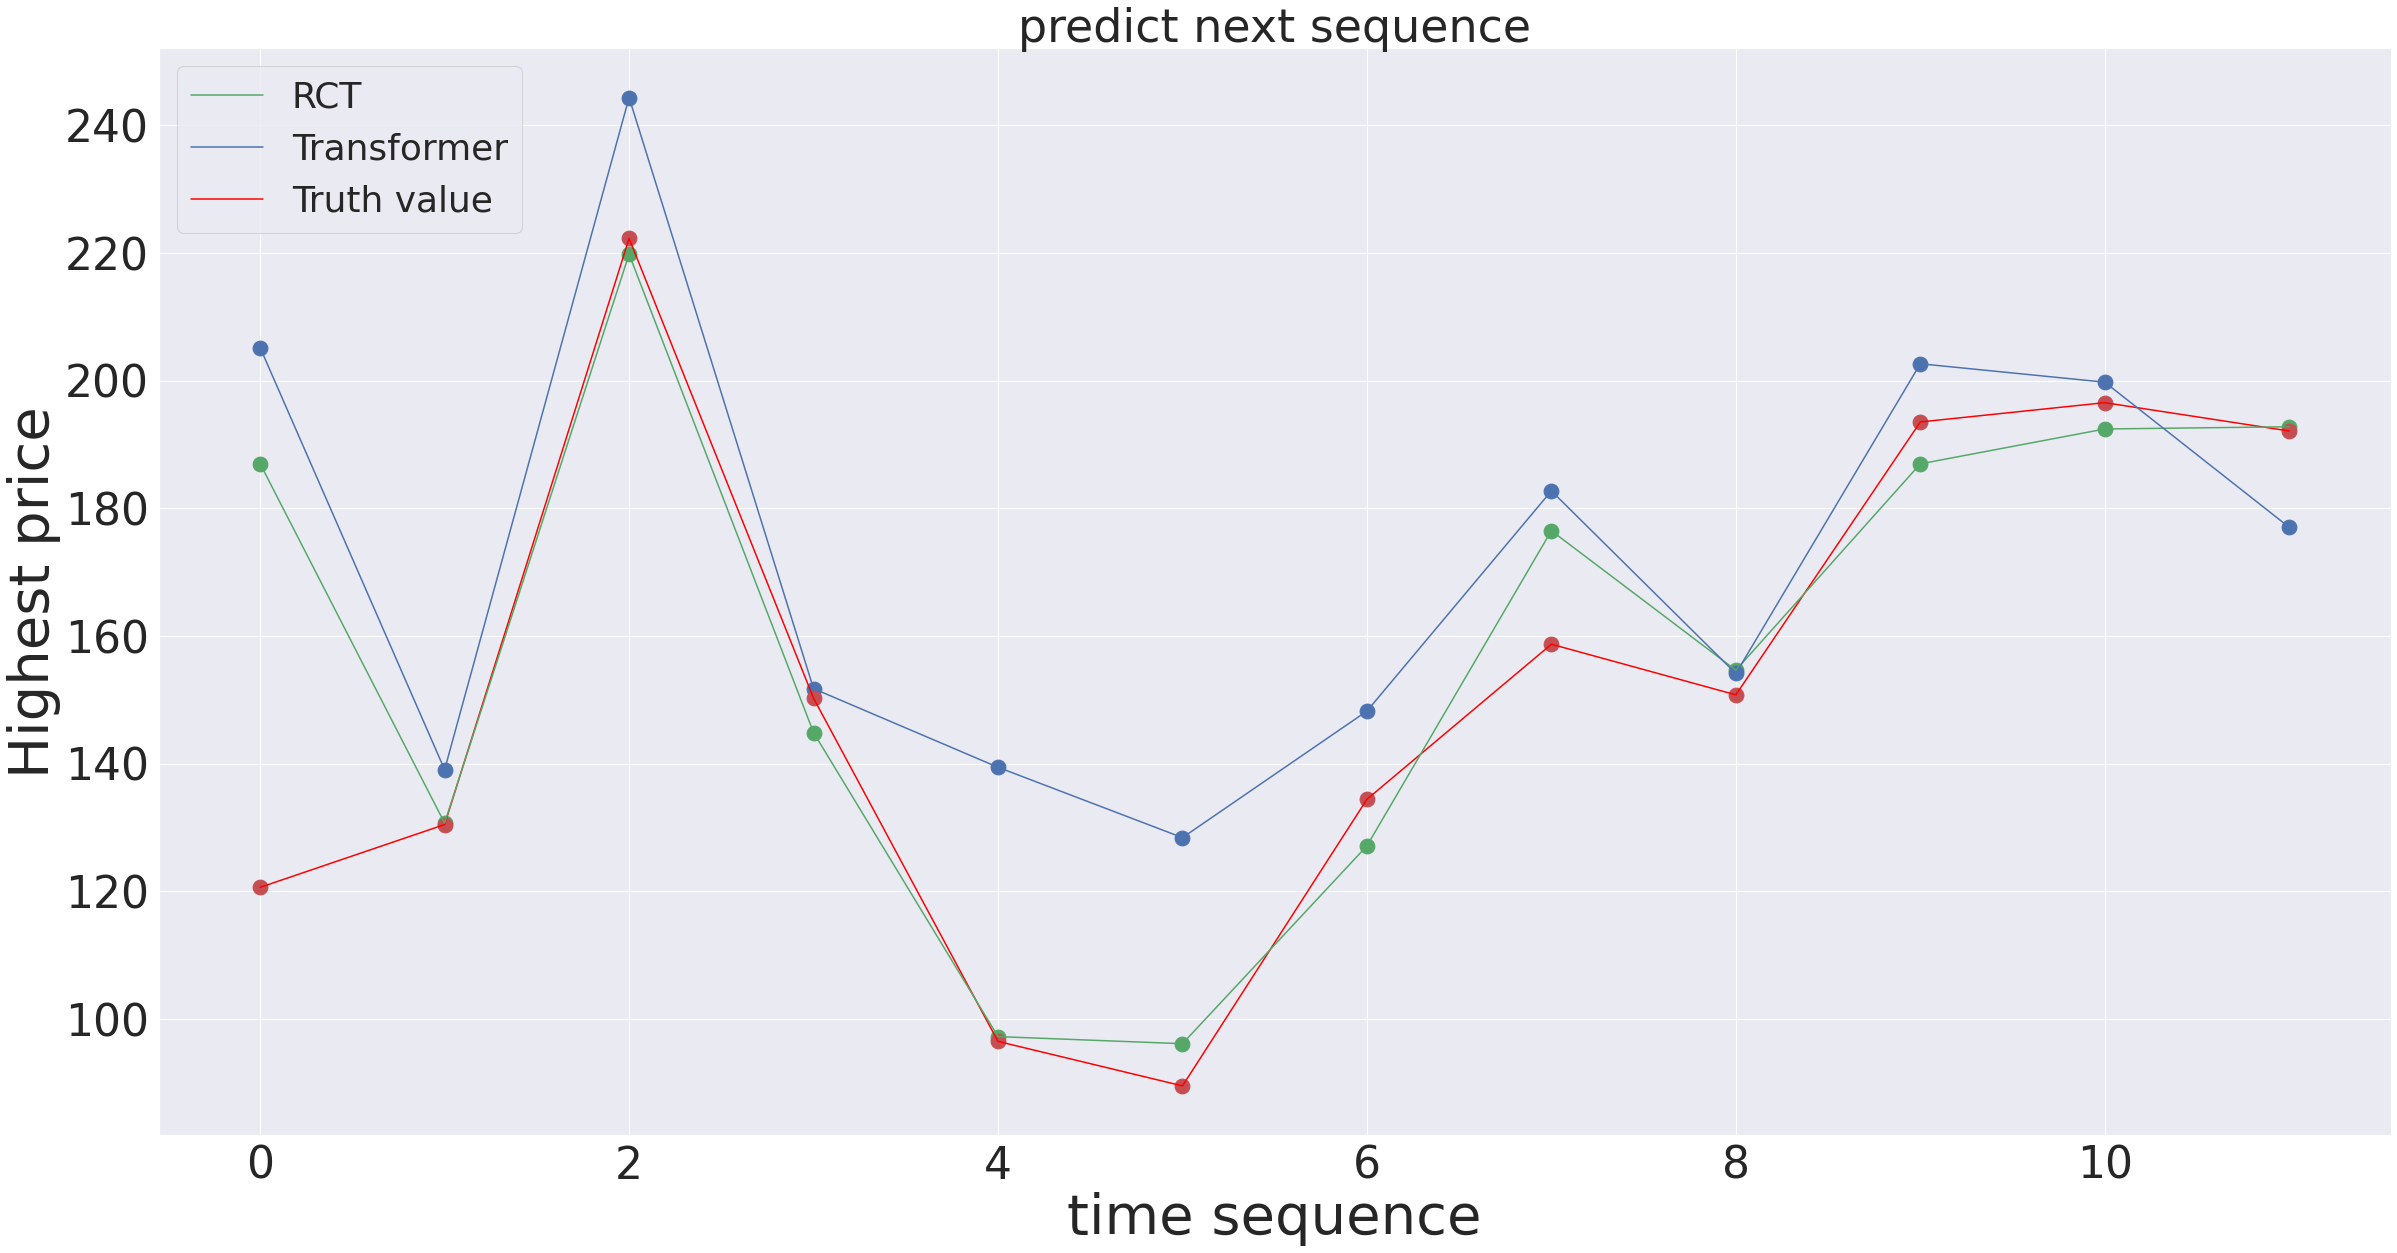

In [38]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 20]
i=0
j=100
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 4)
plt.figure()
plt.plot(xx[i:j],ypred[i:j], color='g', label='RCT', zorder=10)
plt.plot(xx[i:j],trans_y_predict[i:j], color='b', label='Transformer', zorder=10)
plt.plot(xx[i:j],y_test1[i:j], color='red', label='Truth value')

plt.scatter(xx[i:j],ypred[i:j], color='g', s=220, zorder=2)
plt.scatter(xx[i:j],trans_y_predict[i:j], color='b', s=220, zorder=2)
plt.scatter(xx[i:j],y_test1[i:j],  s=220,color='r', zorder=2)

plt.legend(loc="upper left", fontsize=36)
plt.title('predict next sequence', fontsize=46)
plt.xlabel('time sequence', fontsize=56)
plt.ylabel('Highest price', fontsize=56)
plt.show()

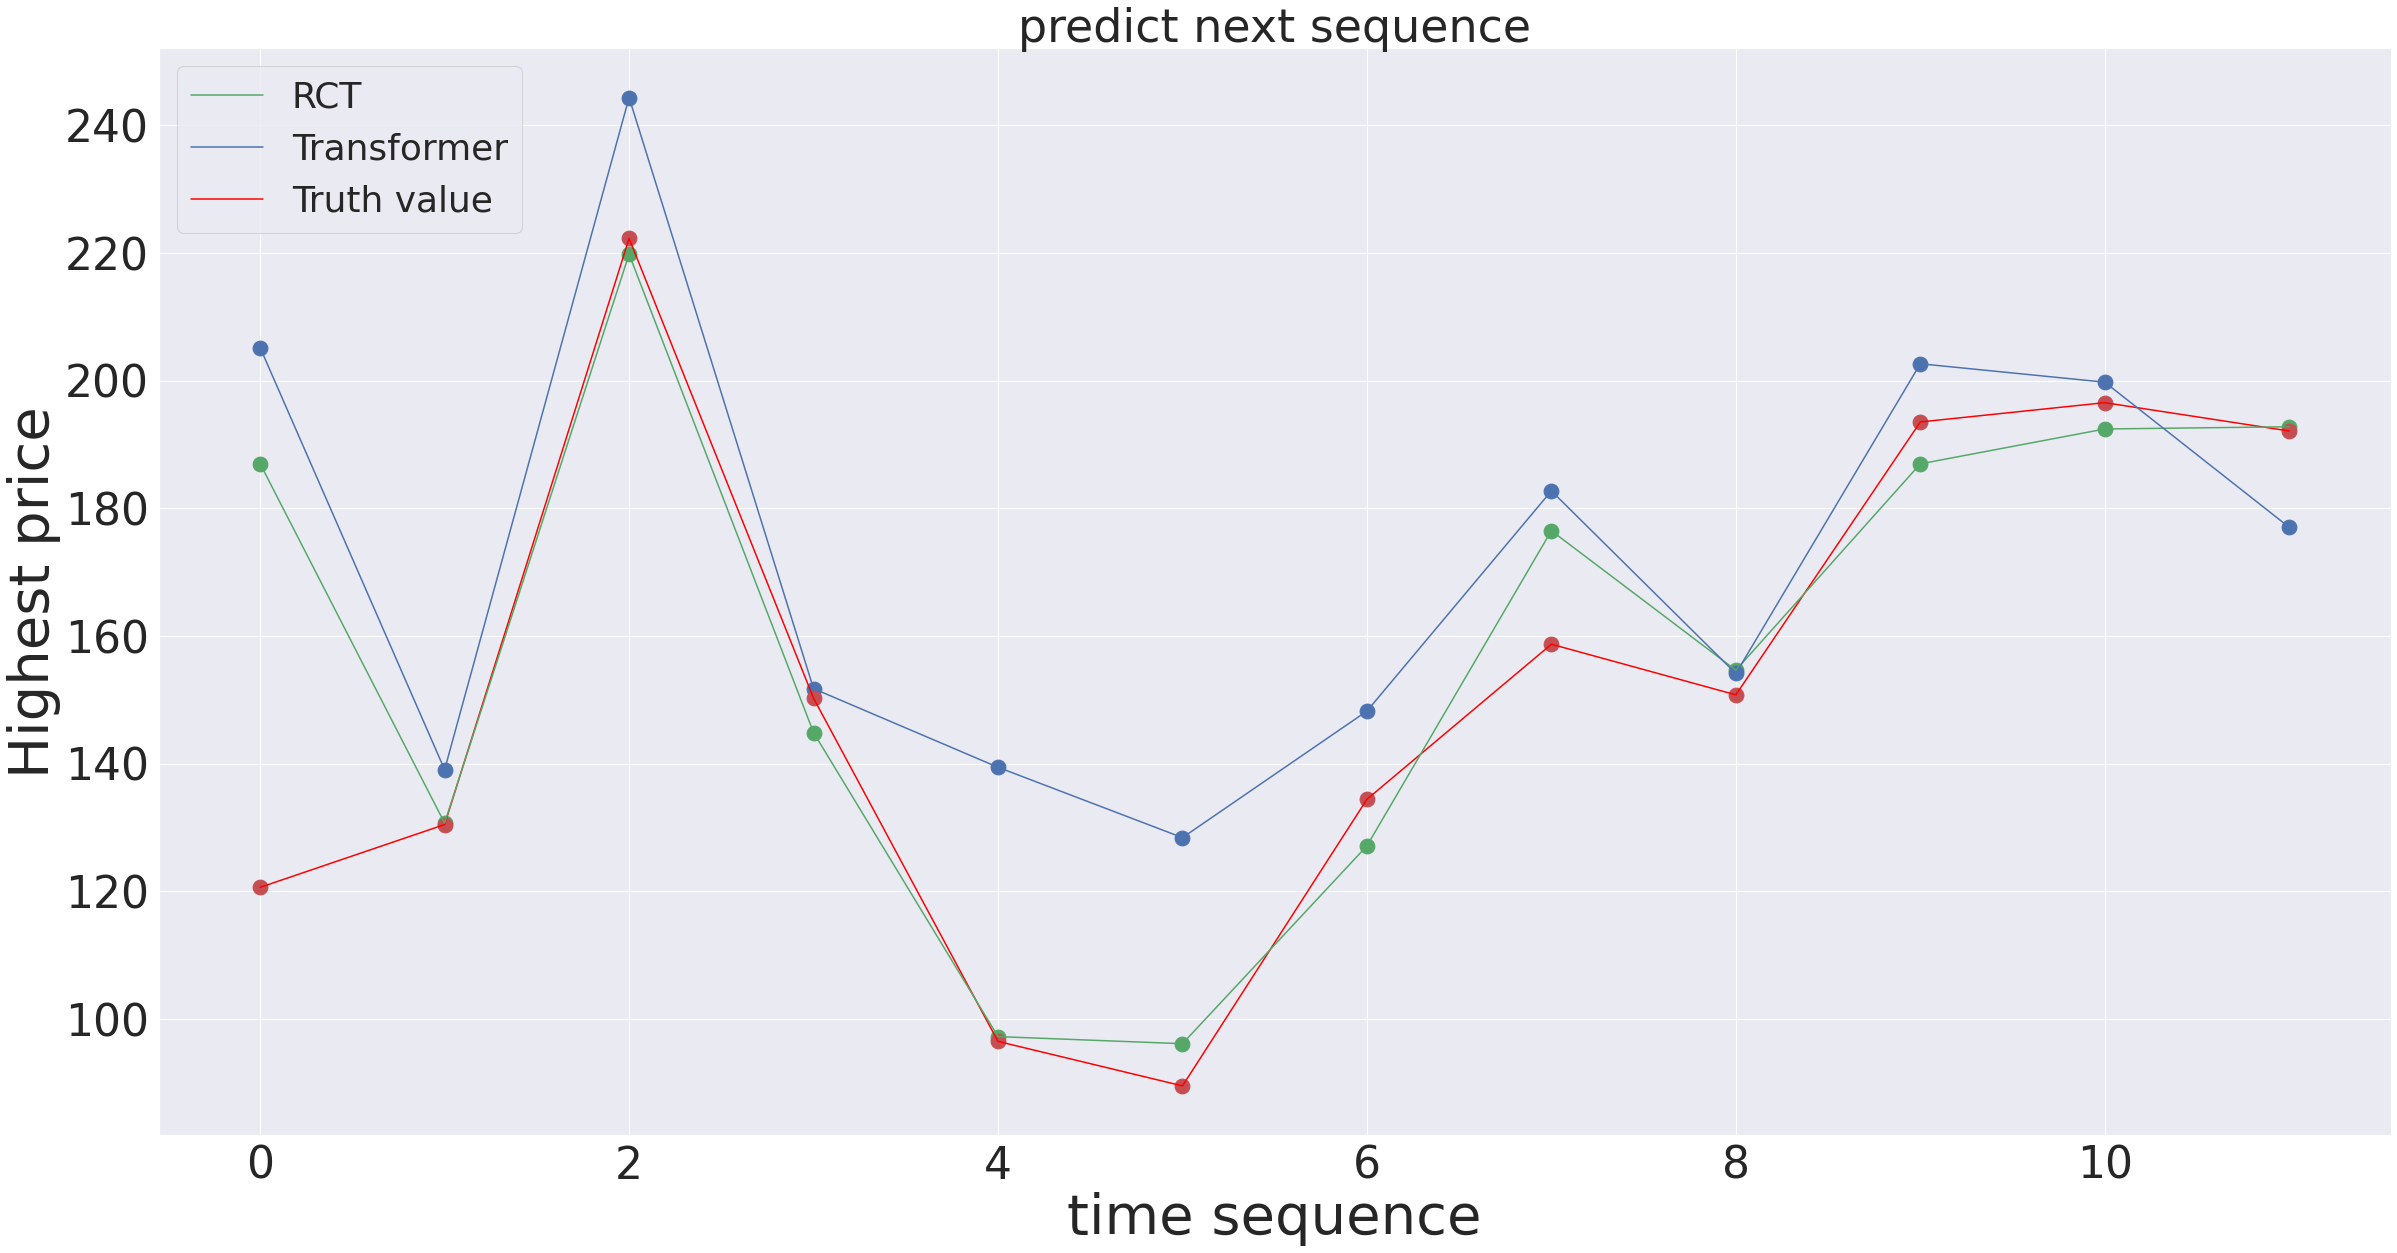

In [39]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 20]
i=0
j=100
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 4)
plt.figure()
plt.plot(xx[i:j],ypred[i:j], color='g', label='RCT', zorder=10)
plt.plot(xx[i:j],trans_y_predict[i:j], color='b', label='Transformer', zorder=10)
plt.plot(xx[i:j],y_test1[i:j], color='red', label='Truth value')

plt.scatter(xx[i:j],ypred[i:j], color='g', s=220, zorder=2)
plt.scatter(xx[i:j],trans_y_predict[i:j], color='b', s=220, zorder=2)
plt.scatter(xx[i:j],y_test1[i:j],  s=220,color='r', zorder=2)

plt.legend(loc="upper left", fontsize=36)
plt.title('predict next sequence', fontsize=46)
plt.xlabel('time sequence', fontsize=56)
plt.ylabel('Highest price', fontsize=56)
plt.show()

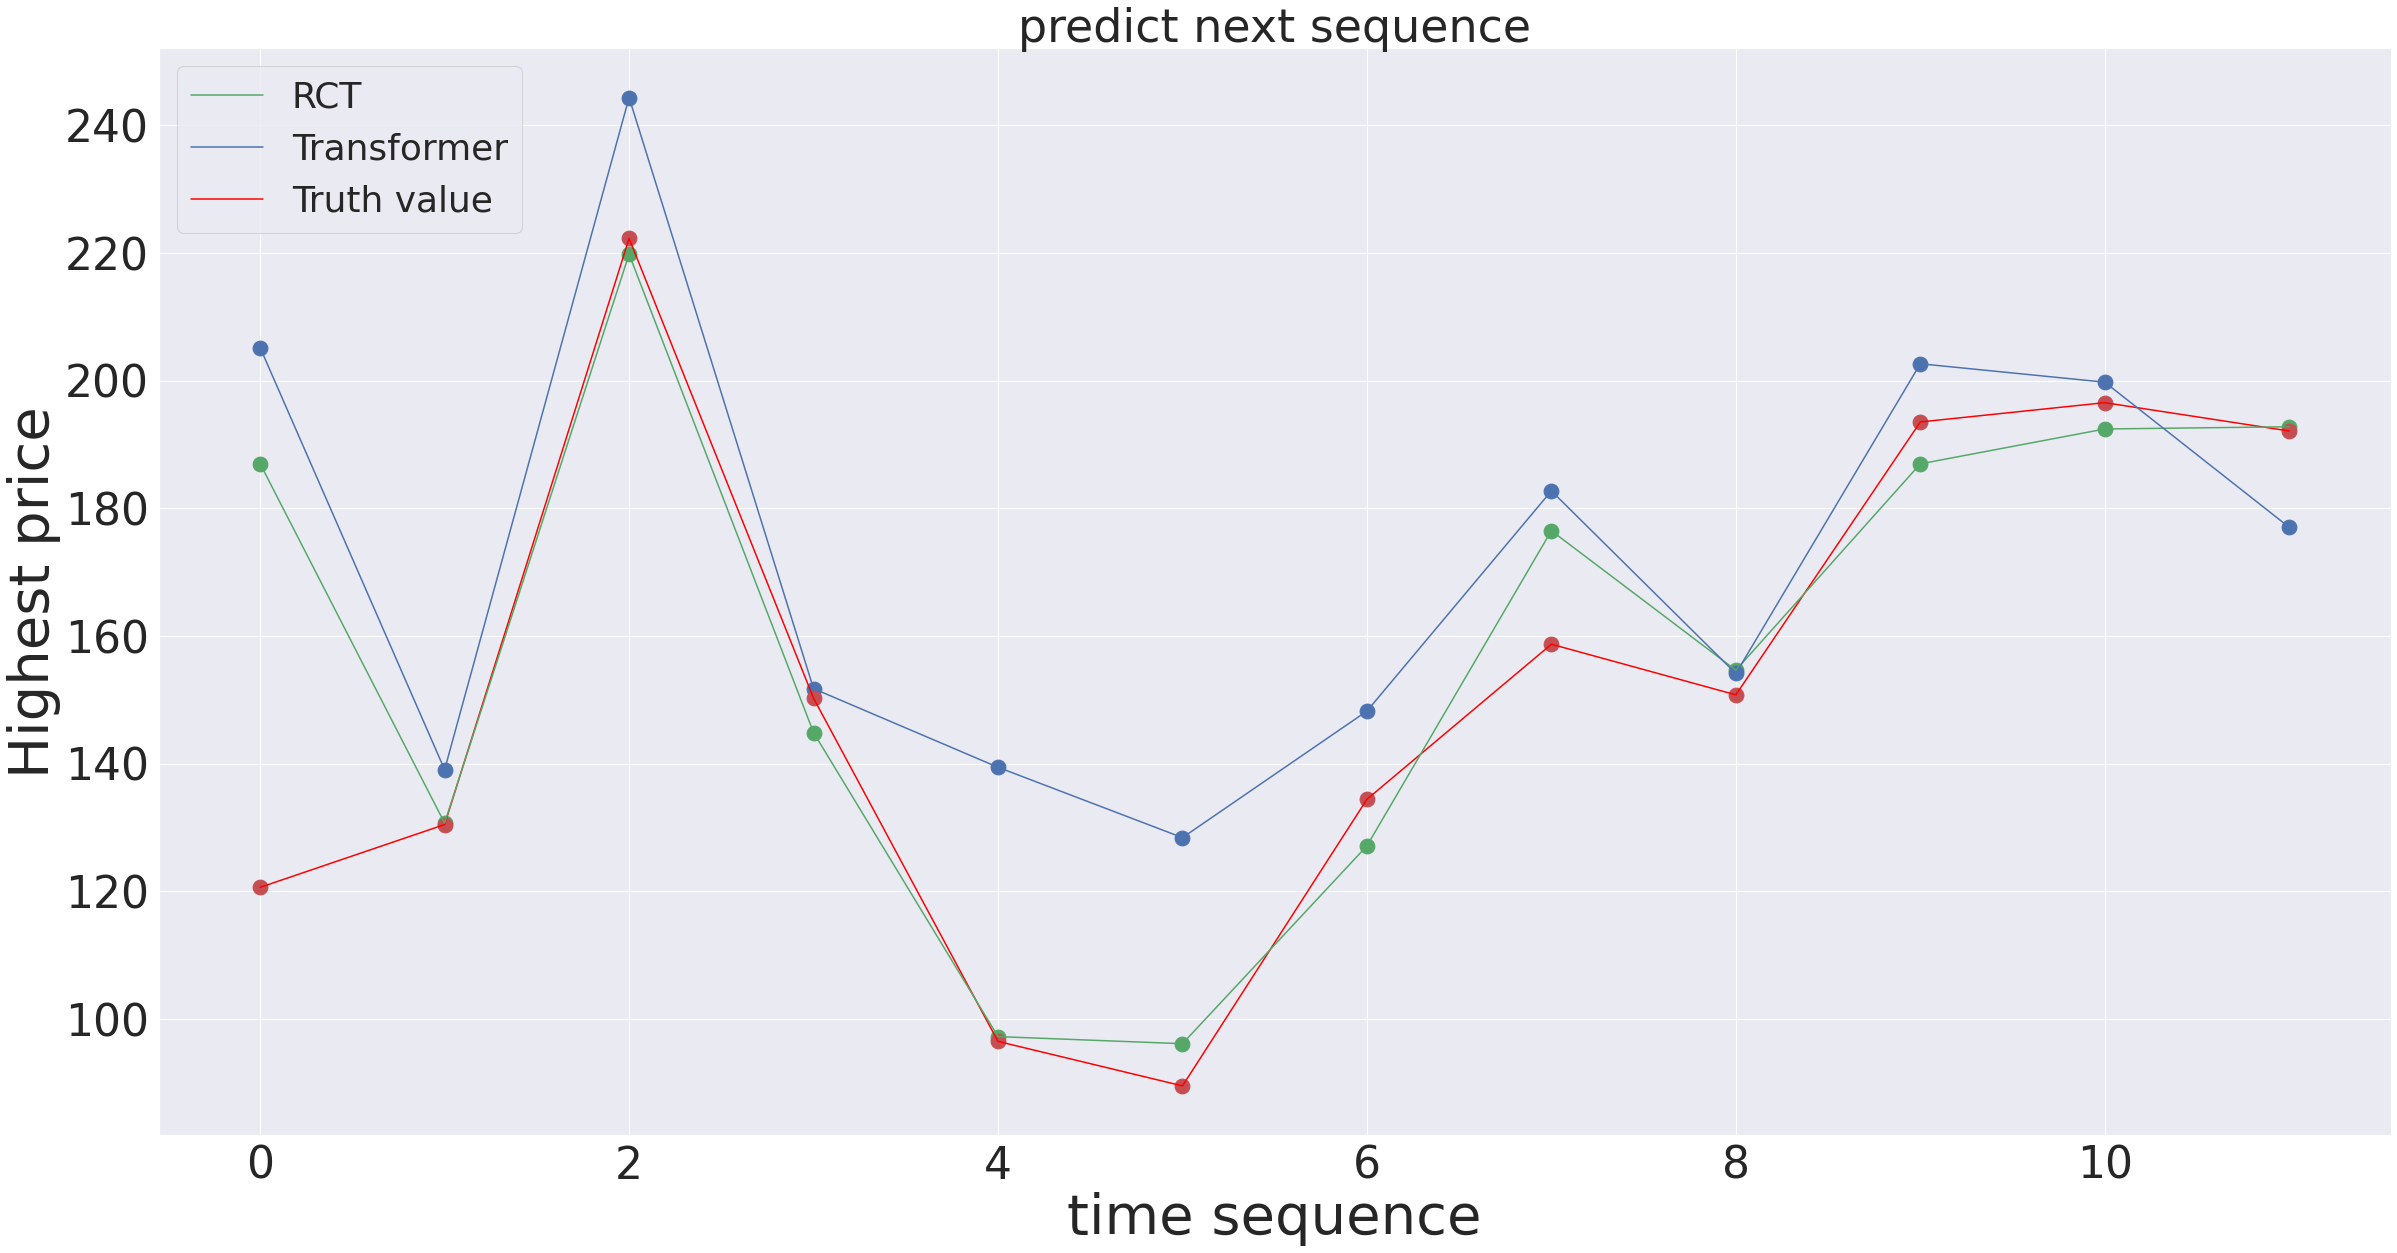

In [40]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 20]
i=0
j=35
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 4)
plt.figure()
plt.plot(xx[i:j],ypred[i:j], color='g', label='RCT', zorder=10)
plt.plot(xx[i:j],trans_y_predict[i:j], color='b', label='Transformer', zorder=10)
plt.plot(xx[i:j],y_test1[i:j], color='red', label='Truth value')

plt.scatter(xx[i:j],ypred[i:j], color='g', s=220, zorder=2)
plt.scatter(xx[i:j],trans_y_predict[i:j], color='b', s=220, zorder=2)
plt.scatter(xx[i:j],y_test1[i:j],  s=220,color='r', zorder=2)

plt.legend(loc="upper left", fontsize=36)
plt.title('predict next sequence', fontsize=46)
plt.xlabel('time sequence', fontsize=56)
plt.ylabel('Highest price', fontsize=56)
plt.show()

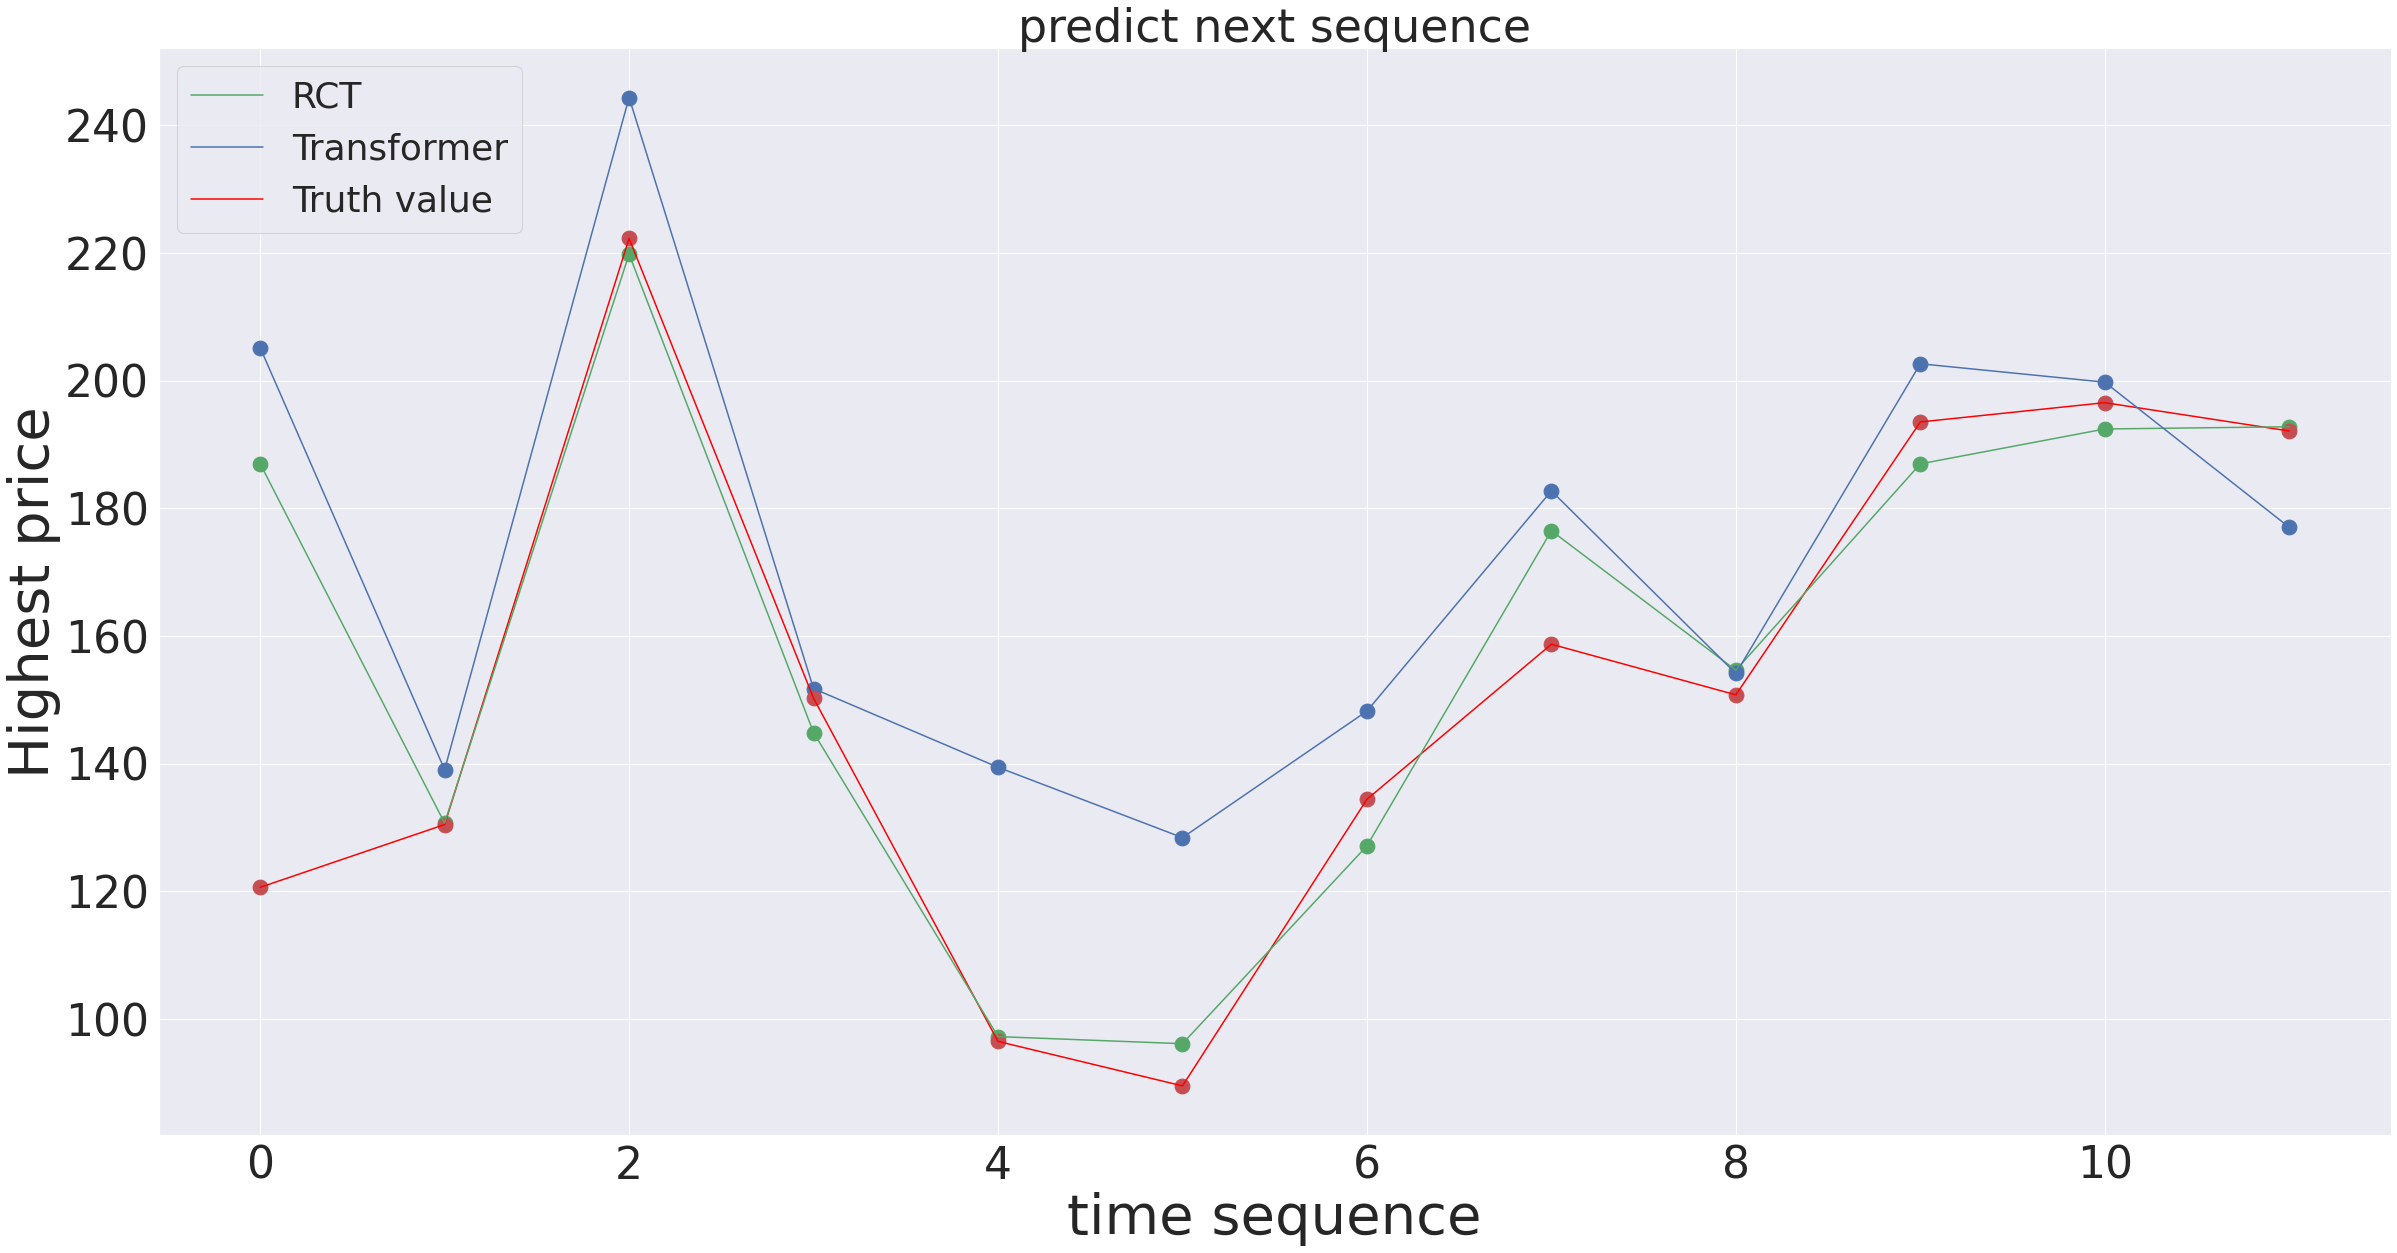

In [41]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 20]
i=0
j=200
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 4)
plt.figure()
plt.plot(xx[i:j],ypred[i:j], color='g', label='RCT', zorder=10)
plt.plot(xx[i:j],trans_y_predict[i:j], color='b', label='Transformer', zorder=10)
plt.plot(xx[i:j],y_test1[i:j], color='red', label='Truth value')

plt.scatter(xx[i:j],ypred[i:j], color='g', s=220, zorder=2)
plt.scatter(xx[i:j],trans_y_predict[i:j], color='b', s=220, zorder=2)
plt.scatter(xx[i:j],y_test1[i:j],  s=220,color='r', zorder=2)

plt.legend(loc="upper left", fontsize=36)
plt.title('predict next sequence', fontsize=46)
plt.xlabel('time sequence', fontsize=56)
plt.ylabel('Highest price', fontsize=56)
plt.show()

In [ ]:
len(ypred)

5636

* compare for the trainig data


ValueError: ignored

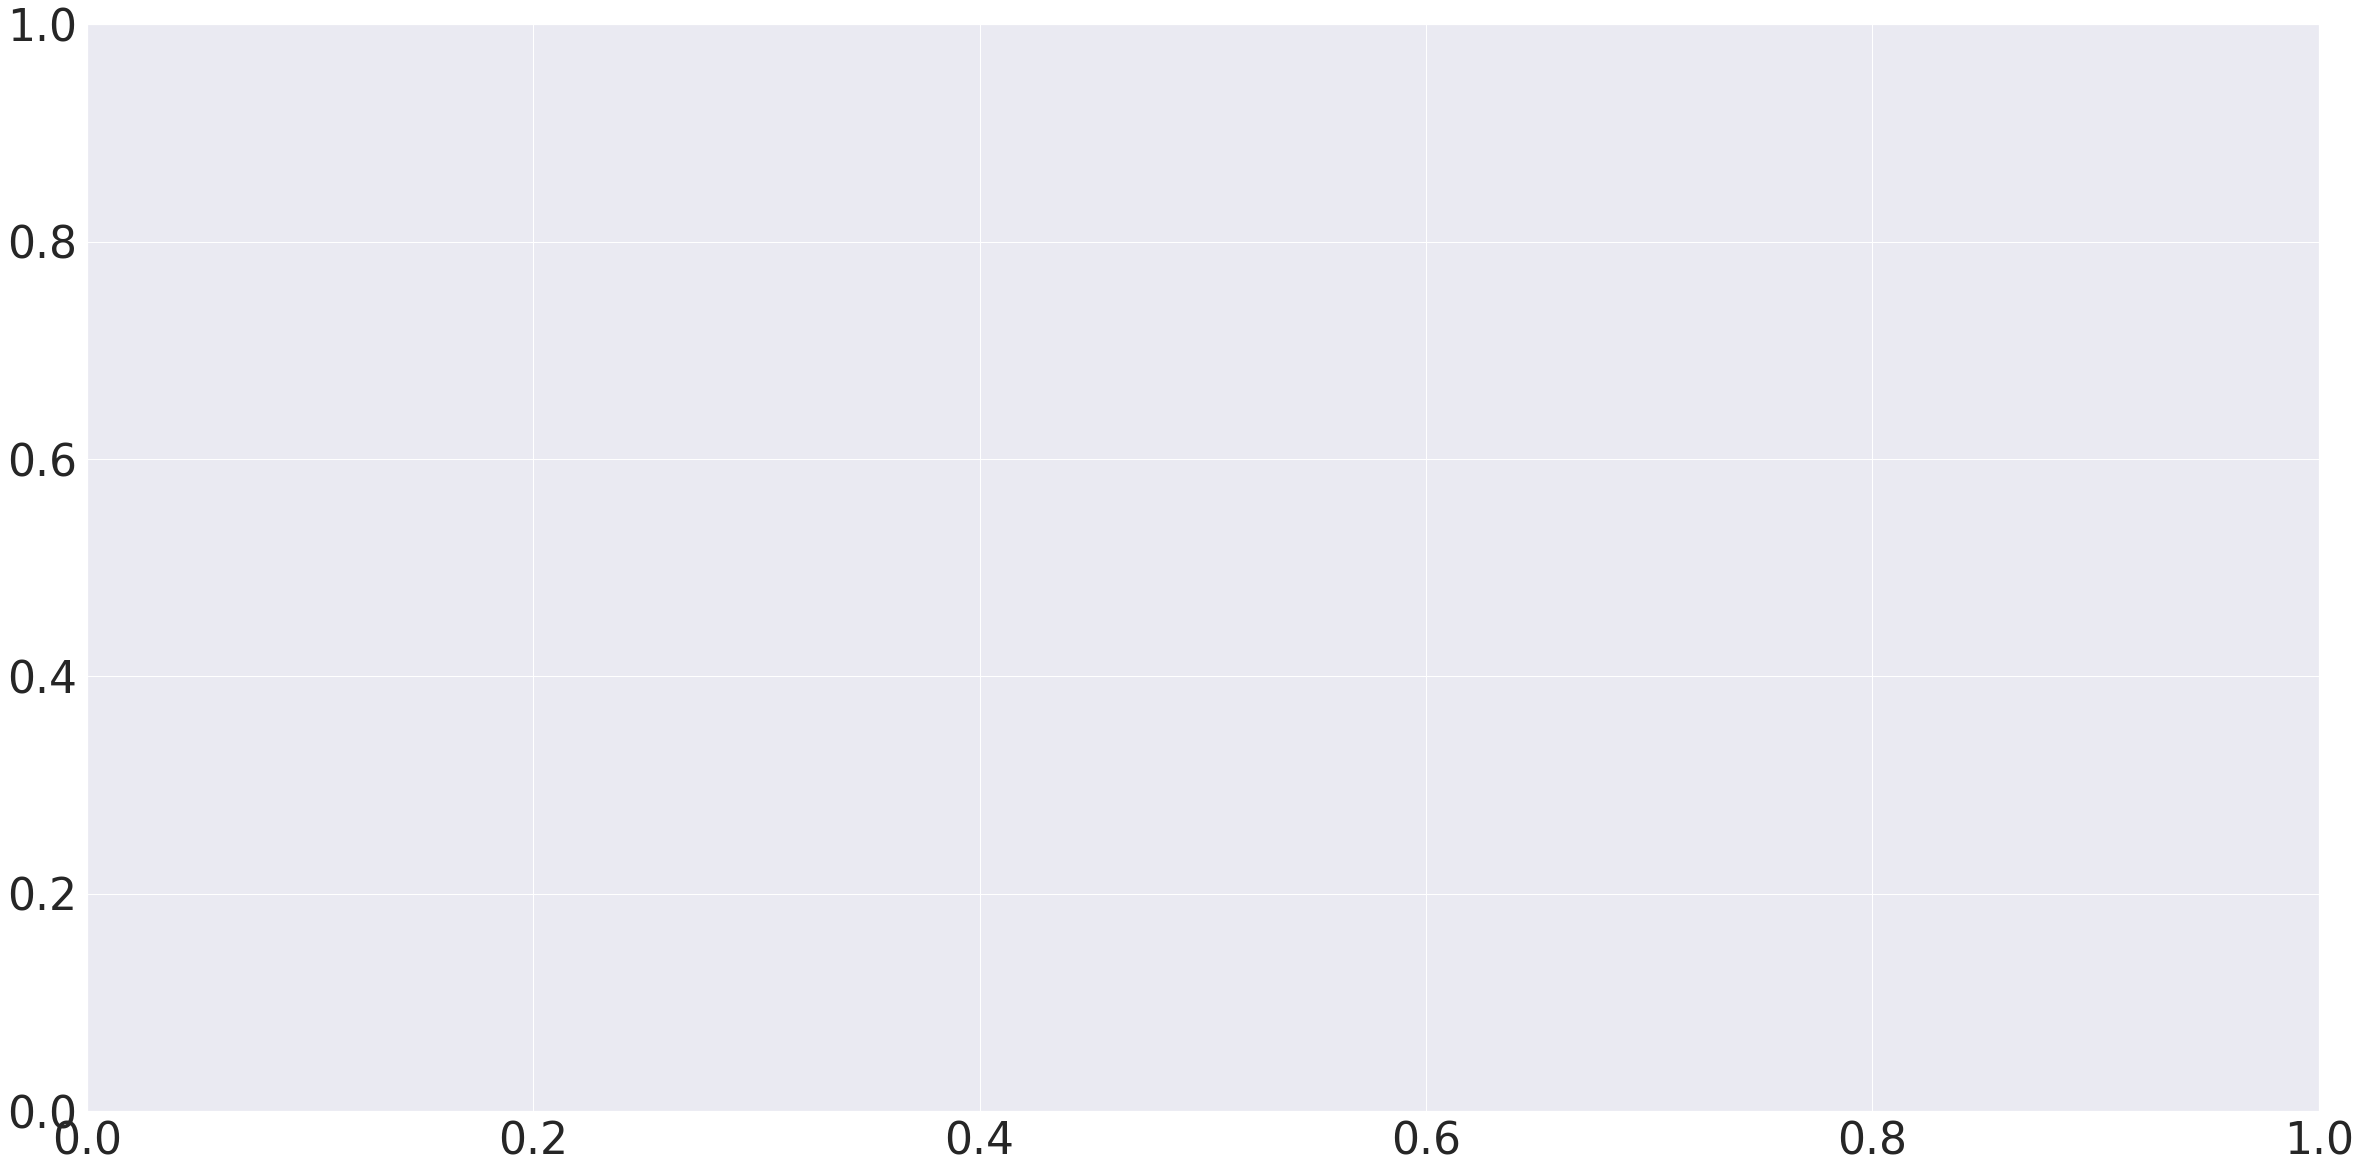

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 20]
i=0
j=5000
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 4)
plt.figure()
plt.plot(xx[i:j],xpred[i:j], color='g', label='RCT', zorder=10)
plt.plot(xx[i:j],trans_x_predict[i:j], color='b', label='Transformer', zorder=10)
plt.plot(xx[i:j],y_train1[i:j], color='red', label='Turth value')

plt.scatter(xx[i:j],xpred[i:j], color='g', s=220, zorder=2)
plt.scatter(xx[i:j],trans_x_predict[i:j], color='b', s=220, zorder=2)
plt.scatter(xx[i:j],y_train1[i:j],  s=220, color='red', zorder=2)

plt.legend(loc="upper left", fontsize=36)
plt.title('predict next sequence', fontsize=46)
plt.xlabel('time sequence', fontsize=56)
plt.ylabel('Highest price', fontsize=56)
plt.show()

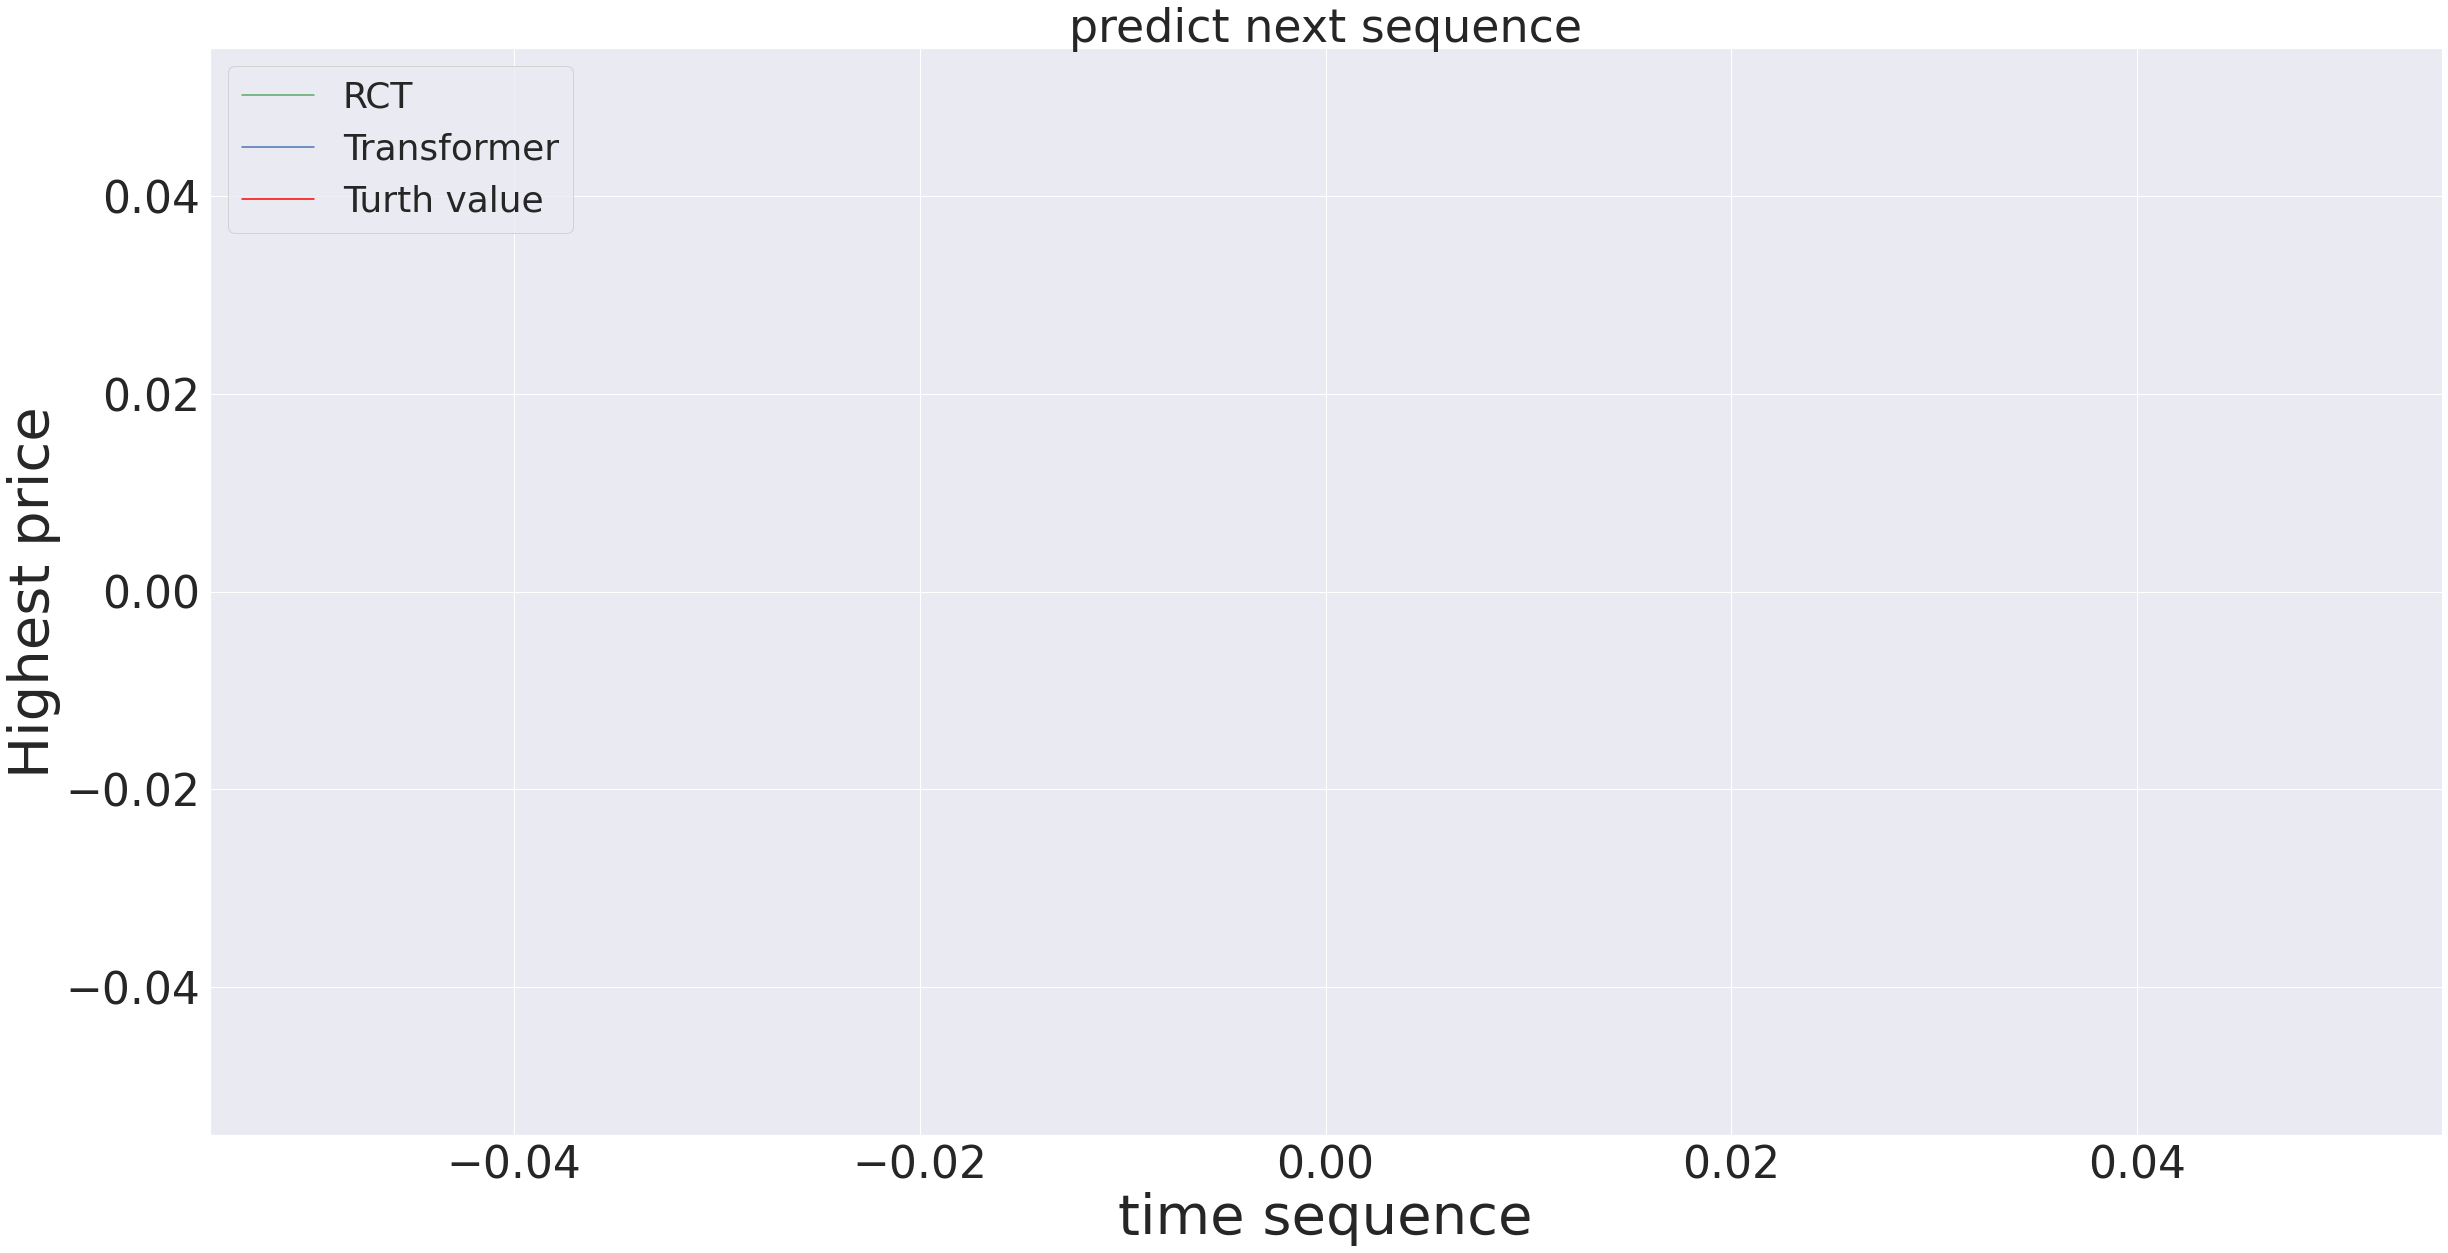

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 20]
i=2500
j=2600
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 4)
plt.figure()
plt.plot(xx[i:j],xpred[i:j], color='g', label='RCT', zorder=10)
plt.plot(xx[i:j],trans_x_predict[i:j], color='b', label='Transformer', zorder=10)
plt.plot(xx[i:j],y_train1[i:j], color='red', label='Turth value')

plt.scatter(xx[i:j],xpred[i:j], color='g', s=220, zorder=2)
plt.scatter(xx[i:j],trans_x_predict[i:j], color='b', s=220, zorder=2)
plt.scatter(xx[i:j],y_train1[i:j],  s=220, color='red', zorder=2)

plt.legend(loc="upper left", fontsize=36)
plt.title('predict next sequence', fontsize=46)
plt.xlabel('time sequence', fontsize=56)
plt.ylabel('Highest price', fontsize=56)
plt.show()

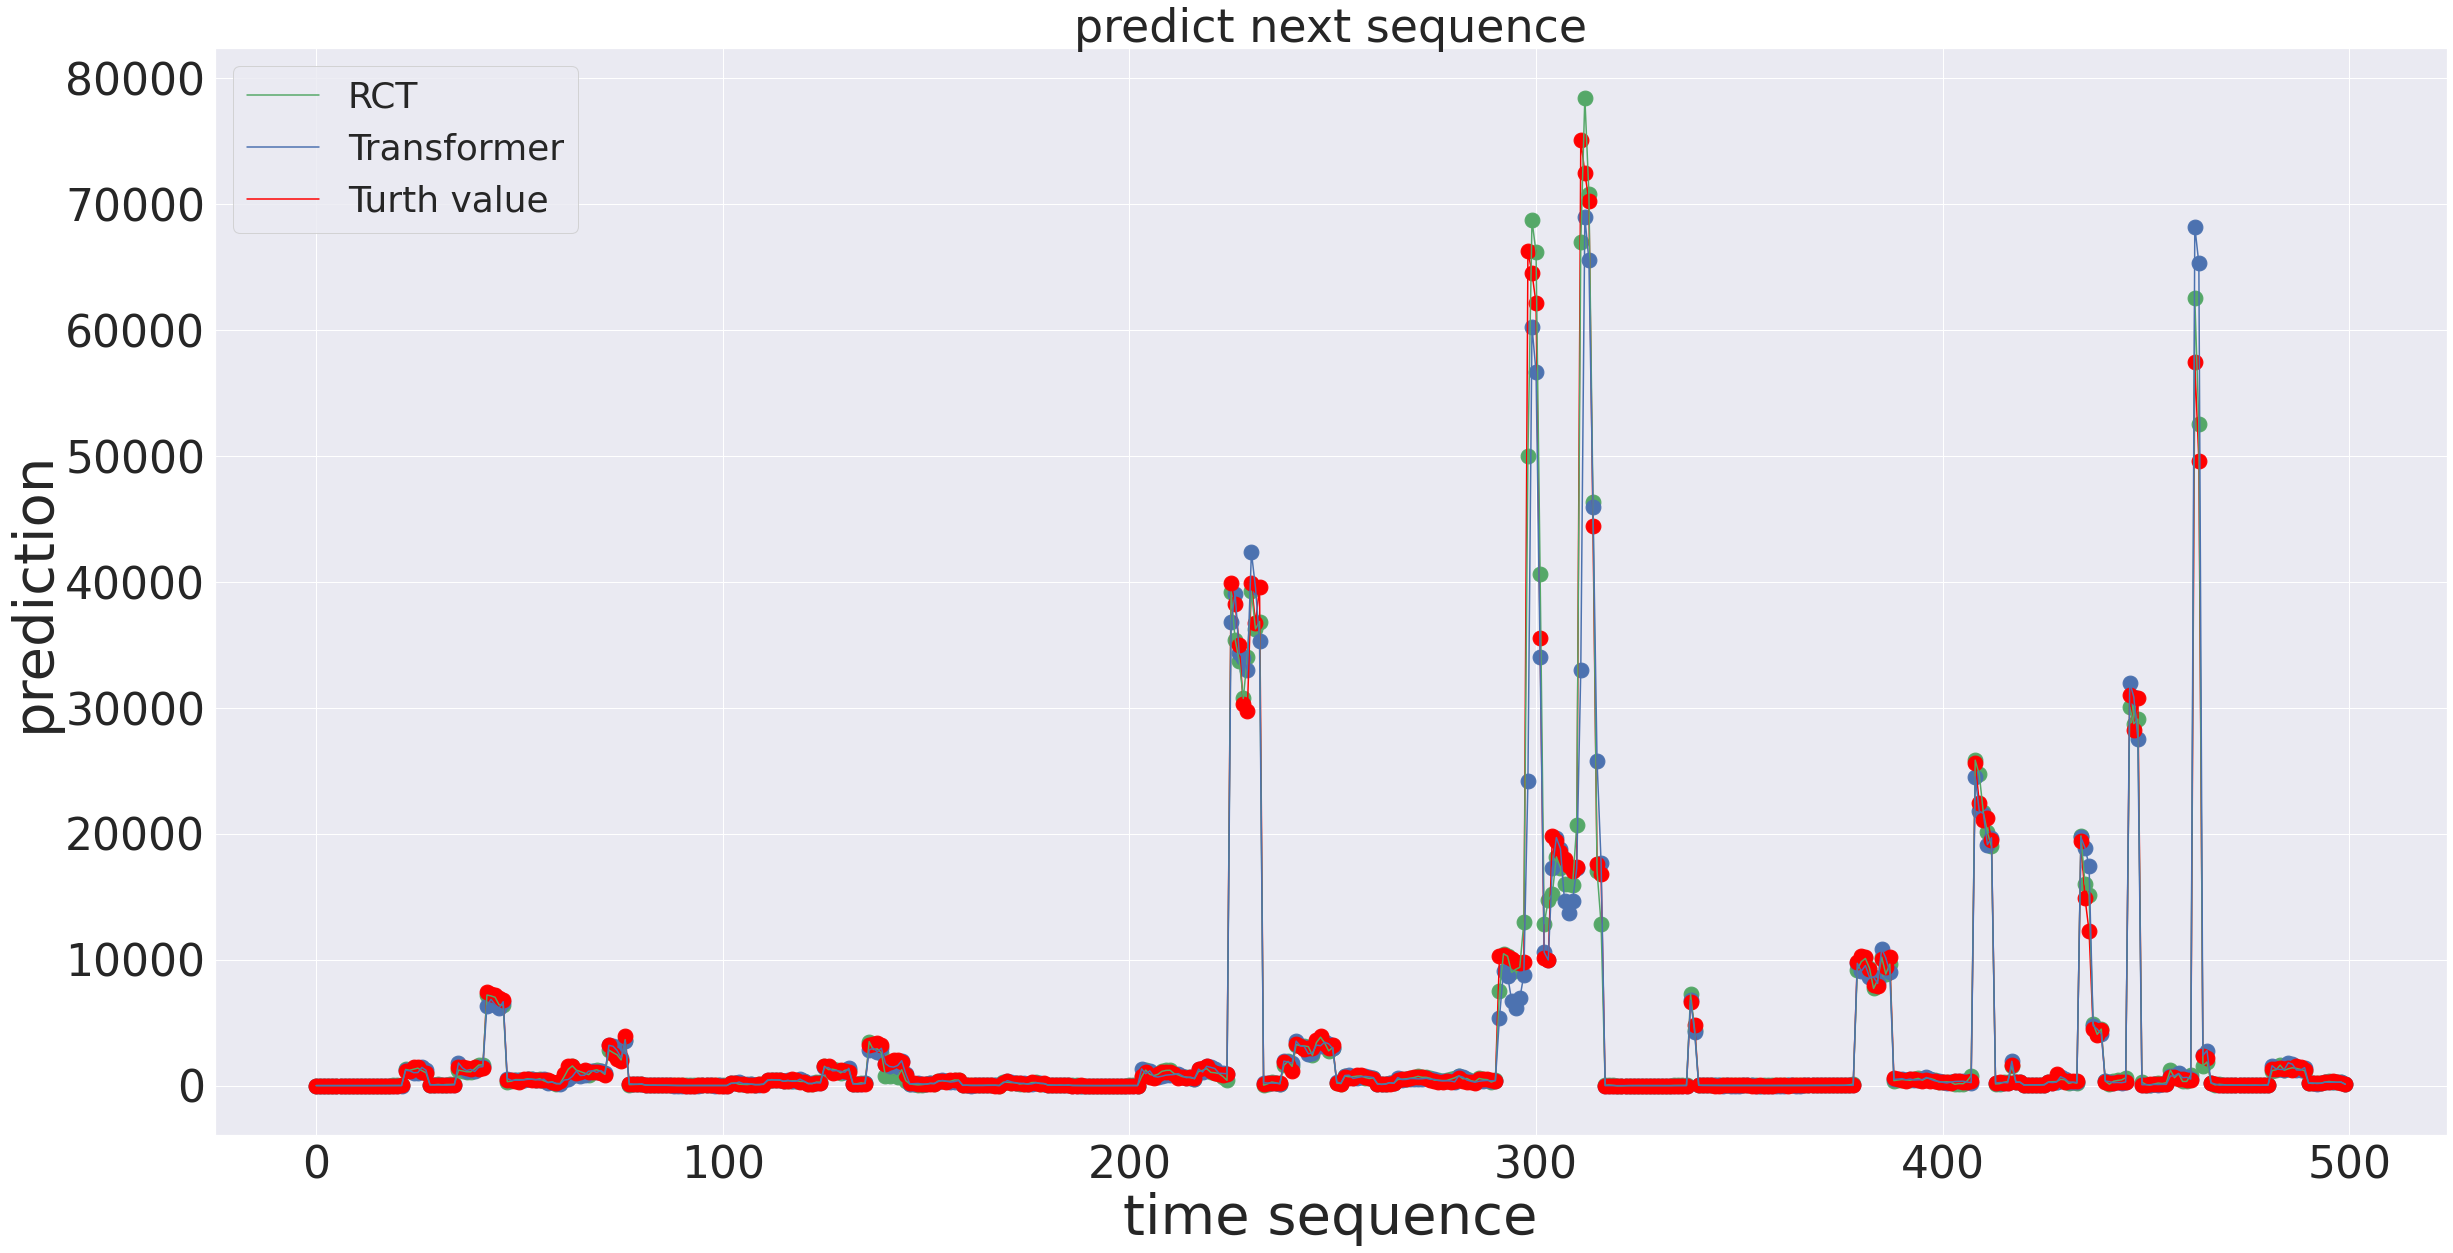

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 20]
i=0
j=500
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 4)
plt.figure()
plt.plot(xx[i:j],xpred[i:j], color='g', label='RCT', zorder=10)
plt.plot(xx[i:j],trans_x_predict[i:j], color='b', label='Transformer', zorder=10)
plt.plot(xx[i:j],y_train1[i:j], color='red', label='Turth value')

plt.scatter(xx[i:j],xpred[i:j], color='g', s=220, zorder=2)
plt.scatter(xx[i:j],trans_x_predict[i:j], color='b', s=220, zorder=2)
plt.scatter(xx[i:j],y_train1[i:j],  s=220, color='red', zorder=2)

plt.legend(loc="upper left", fontsize=36)
plt.title('predict next sequence', fontsize=46)
plt.xlabel('time sequence', fontsize=56)
plt.ylabel('prediction', fontsize=56)
plt.show()